In [1]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## importing data & setting dataset showing numbers
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
dataset = pd.read_csv('train.csv',index_col='Id')
dataset.head(10)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   
6           50       RL         85.0    14115   Pave   NaN      IR1   
7           20       RL         75.0    10084   Pave   NaN      Reg   
8           60       RL          NaN    10382   Pave   NaN      IR1   
9           50       RM         51.0     6120   Pave   NaN      Reg   
10         190       RL         50.0     7420   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
6          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
7          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
8          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
9          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
10         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   
6        Norm     1Fam     1.5Fin            5            5       1993   
7        Norm     1Fam     1Story            8            5       2004   
8        Norm     1Fam     2Story            7            6       1973   
9        Norm     1Fam     1.5Fin            7            5       1931   
10     Artery   2fmCon     1.5Unf            5            6       1939   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd        NaN   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
6           1995     Gable  CompShg     VinylSd     VinylSd        NaN   
7           2005     Gable  CompShg     VinylSd     VinylSd      Stone   
8           1973     Gable  CompShg     HdBoard     HdBoard      Stone   
9           1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
10          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd    

In [3]:
## data preprocessing 

In [4]:
dataset.shape

(1460, 80)

In [5]:
dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
dataset.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [7]:
dataset.describe().shape

(8, 37)

In [8]:
dataset.describe(include=['O'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq        1141     1434         515         504        445       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [9]:
dataset.describe(include=['O']).shape

(4, 43)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [11]:
dataset.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [12]:
## deleting columns with higher then 50% number of NAN amounts
dataset = dataset.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'MasVnrType'], axis=1)

In [13]:
## setting all NaN amounts to numpy nan
dataset.replace('NaN', np.nan, inplace=True)

In [14]:
## looking into MSSubClass feature and its effect on SalePrice
sorted(dataset['MSSubClass'].unique())

[np.int64(20),
 np.int64(30),
 np.int64(40),
 np.int64(45),
 np.int64(50),
 np.int64(60),
 np.int64(70),
 np.int64(75),
 np.int64(80),
 np.int64(85),
 np.int64(90),
 np.int64(120),
 np.int64(160),
 np.int64(180),
 np.int64(190)]

In [15]:
dataset['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

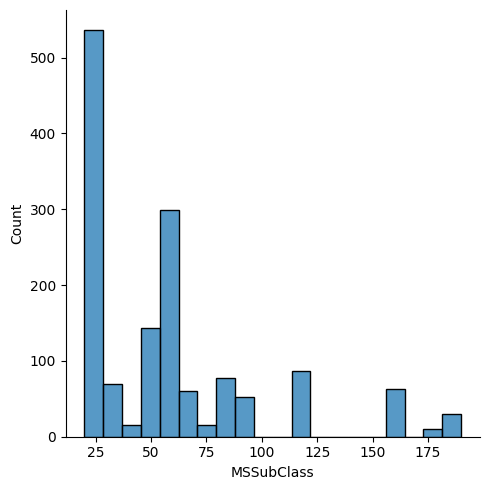

In [16]:
sns.displot(dataset['MSSubClass'], kde=False, bins=20)

C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_14432\3301943470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSSubClass', y='SalePrice', data=dataset, palette=default_colors)
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_14432\3301943470.py:2: UserWarning: 
The palette list has fewer values (3) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='MSSubClass', y='SalePrice', data=dataset, palette=default_colors)


<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

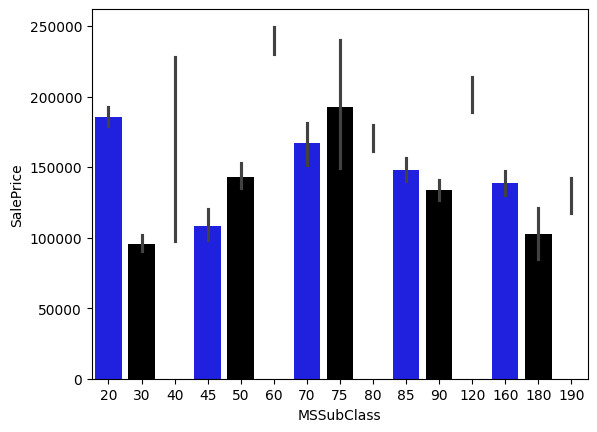

In [17]:
default_colors = ['b', 'k', 'w']
sns.barplot(x='MSSubClass', y='SalePrice', data=dataset, palette=default_colors)

In [18]:
## parting categorical features and numerical features from each other
data_types = dataset.dtypes 

In [19]:
categorical_features = data_types[data_types == 'object'].index

In [20]:
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
categorical_dataset = dataset[categorical_features]

In [22]:
categorical_dataset.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
Id                                                                      
1        RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
2        RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
3        RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4        RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
5        RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

   Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
Id                                                                             
1       CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
2       Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
3       CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
4       Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
5       NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

   Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                            
1      VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   
2      MetalSd     MetalSd        TA        TA     CBlock       Gd       TA   
3      VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   
4      Wd Sdng     Wd Shng        TA        TA     BrkTil       TA       Gd   
5      VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   

   BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
Id                                                                       
1            No          GLQ          Unf    GasA        Ex          Y   
2            Gd          ALQ          Unf    GasA        Ex          Y   
3            Mn          GLQ          Unf    GasA        Ex          Y   
4            No          ALQ          Unf    GasA        Gd          Y   
5            Av          GLQ          Unf    GasA        Ex          Y   

   Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish  \
Id                                                                         
1       SBrkr          Gd        Typ         NaN     Attchd          RFn   
2       SBrkr          TA        Typ          TA     Attchd          RFn   
3       SBrkr          Gd        Typ          TA     Attchd          RFn   
4       SBrkr          Gd        Typ          Gd     Detchd          Unf   
5       SBrkr          Gd        Typ          TA     Attchd          RFn   

   GarageQual GarageCond PavedDrive SaleType SaleCondition  
Id                                                          
1          TA         TA          Y       WD        Normal  
2          TA         TA          Y       WD        Normal  
3          TA         TA          Y       WD        Normal  
4          TA         TA          Y       WD       Abnorml  
5          TA         TA          Y       WD        Normal

In [23]:
categorical_dataset.shape

(1460, 38)

In [24]:
data_types = dataset.dtypes 

In [25]:
numerical_features = data_types[data_types != 'object'].index

In [26]:
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [27]:
numerical_dataset = dataset[numerical_features]

In [28]:
numerical_dataset.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1           60         65.0     8450            7            5       2003   
2           20         80.0     9600            6            8       1976   
3           60         68.0    11250            7            5       2001   
4           70         60.0     9550            7            5       1915   
5           60         84.0    14260            8            5       2000   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           2003       196.0         706           0        150          856   
2           1976         0.0         978           0        284         1262   
3           2002       162.0         486           0        434          920   
4           1970         0.0         216           0        540          756   
5           2000       350.0         655           0        490         1145   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                            
1        856       854             0       1710             1             0   
2       1262         0             0       1262             0             1   
3        920       866             0       1786             1             0   
4        961       756             0       1717             1             0   
5       1145      1053             0       2198             1             0   

    FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
Id                                                                             
1          2         1             3             1             8           0   
2          2         0             3             1             6           1   
3          2         1             3             1             6           1   
4          1         0             3             1             7           1   
5          2         1             4             1             9           1   

    GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
Id                                                                 
1        2003.0           2         548           0           61   
2        1976.0           2         460         298            0   
3        2001.0           2         608           0           42   
4        1998.0           3         642           0           35   
5        2000.0           3         836         192           84   

    EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
Id                                                                             
1               0          0            0         0        0       2    2008   
2               0          0            0         0        0       5    2007   
3               0          0            0         0        0       9    2008   
4             272          0            0         0        0       2    2006   
5               0          0            0         0        0      12    2008   

    SalePrice  
Id             
1      208500  
2      181500  
3      223500  
4      140000  
5      250000

In [29]:
numerical_dataset.shape

(1460, 37)

In [30]:
## Segmentation of categorical and numerical features in order to Visualize them properly
categorical_1 = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2']
categorical_2 = ['BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']
categorical_3 = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional']
categorical_4 = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']
numerical_1 = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']
numerical_2 = ['BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']
numerical_3 = ['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']
numerical_4 = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
numerical_5 = ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']
numerical_6 = [ 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
numerical_7 = ['GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
numerical_8 = ['MoSold', 'YrSold', 'MiscVal' ]

In [31]:
## Visualizing numerical and categorical features

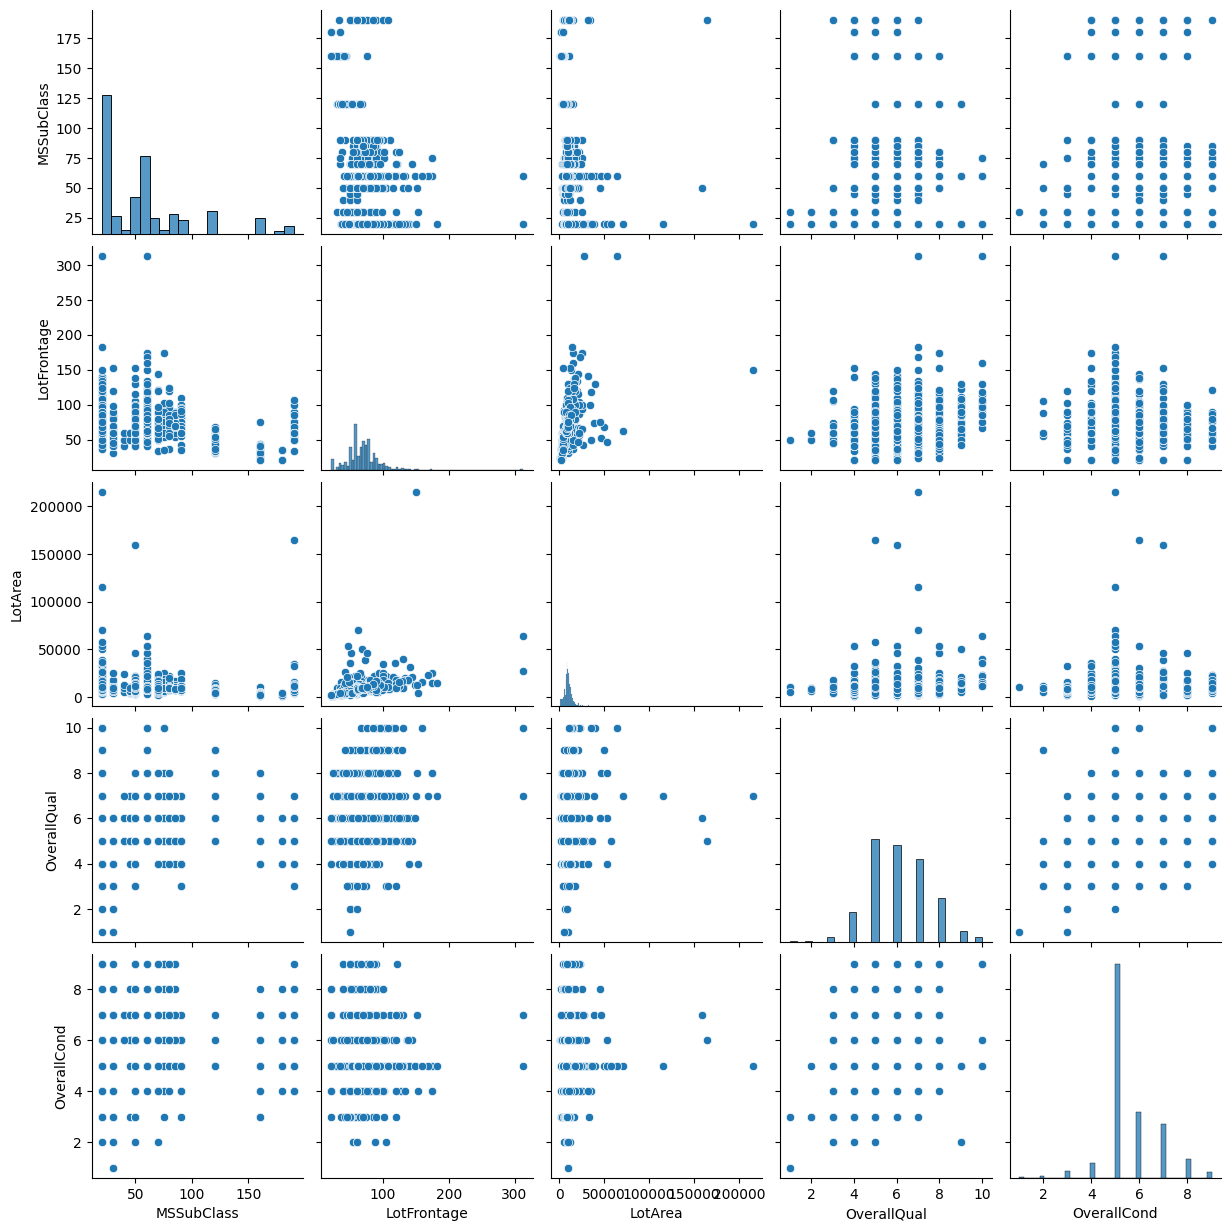

In [32]:
sns.pairplot(dataset[numerical_1])
plt.show()

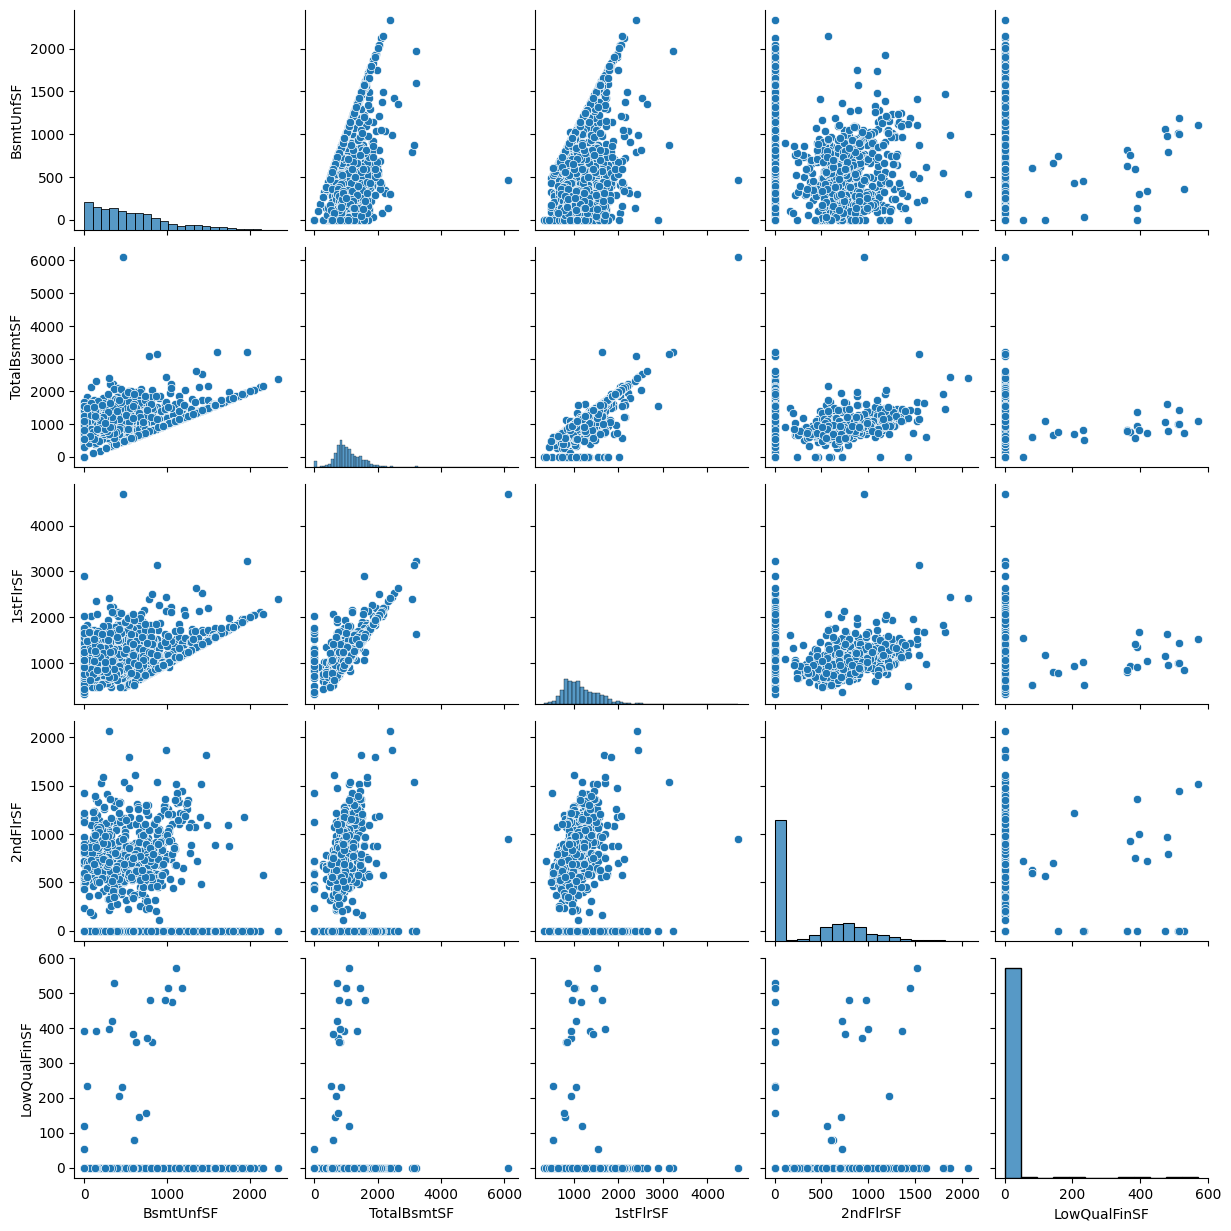

In [33]:
sns.pairplot(dataset[numerical_2])
plt.show()

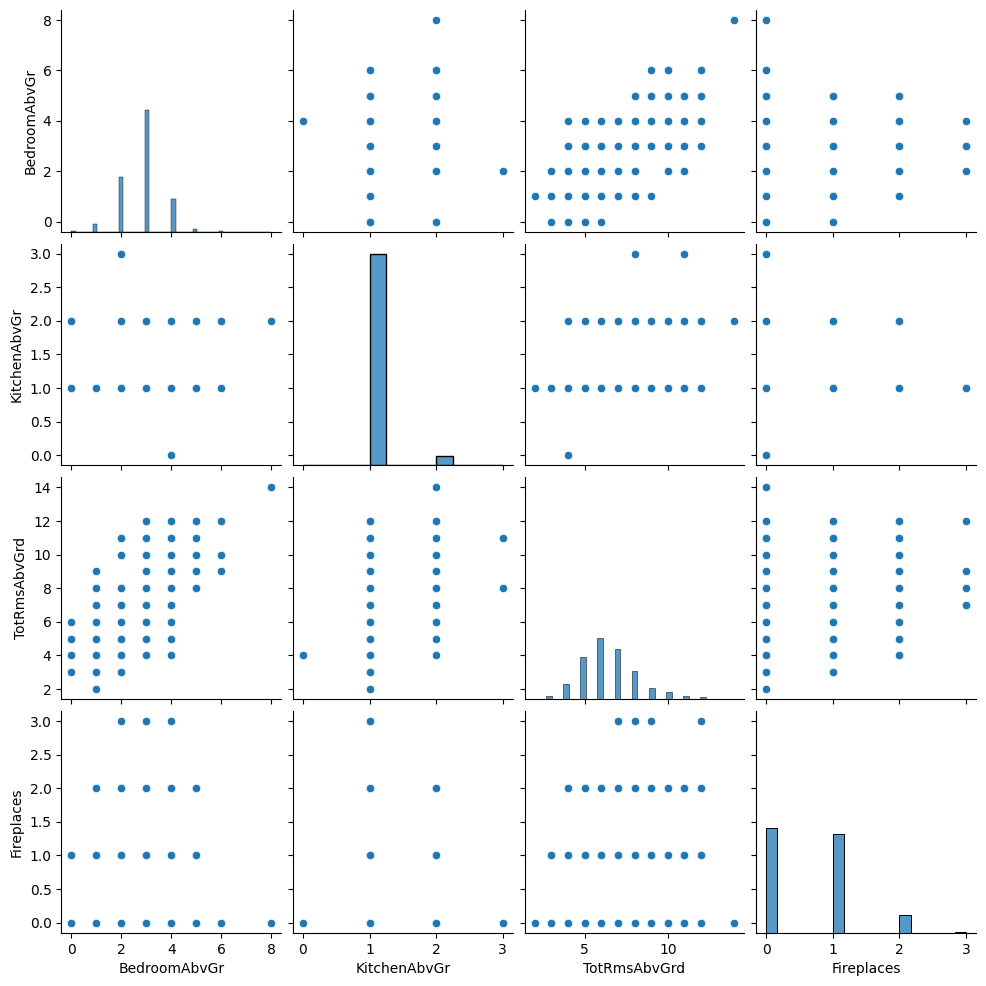

In [34]:
sns.pairplot(dataset[numerical_3])
plt.show()

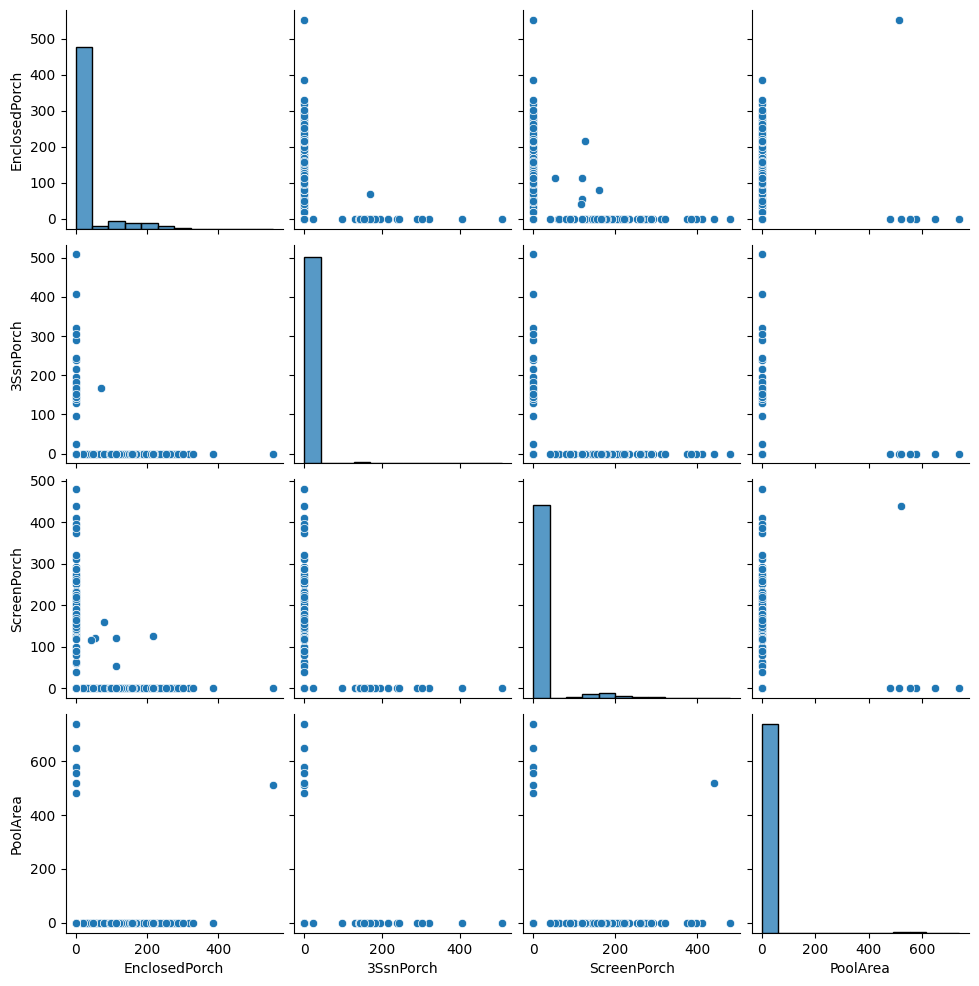

In [35]:
sns.pairplot(dataset[numerical_4])
plt.show()

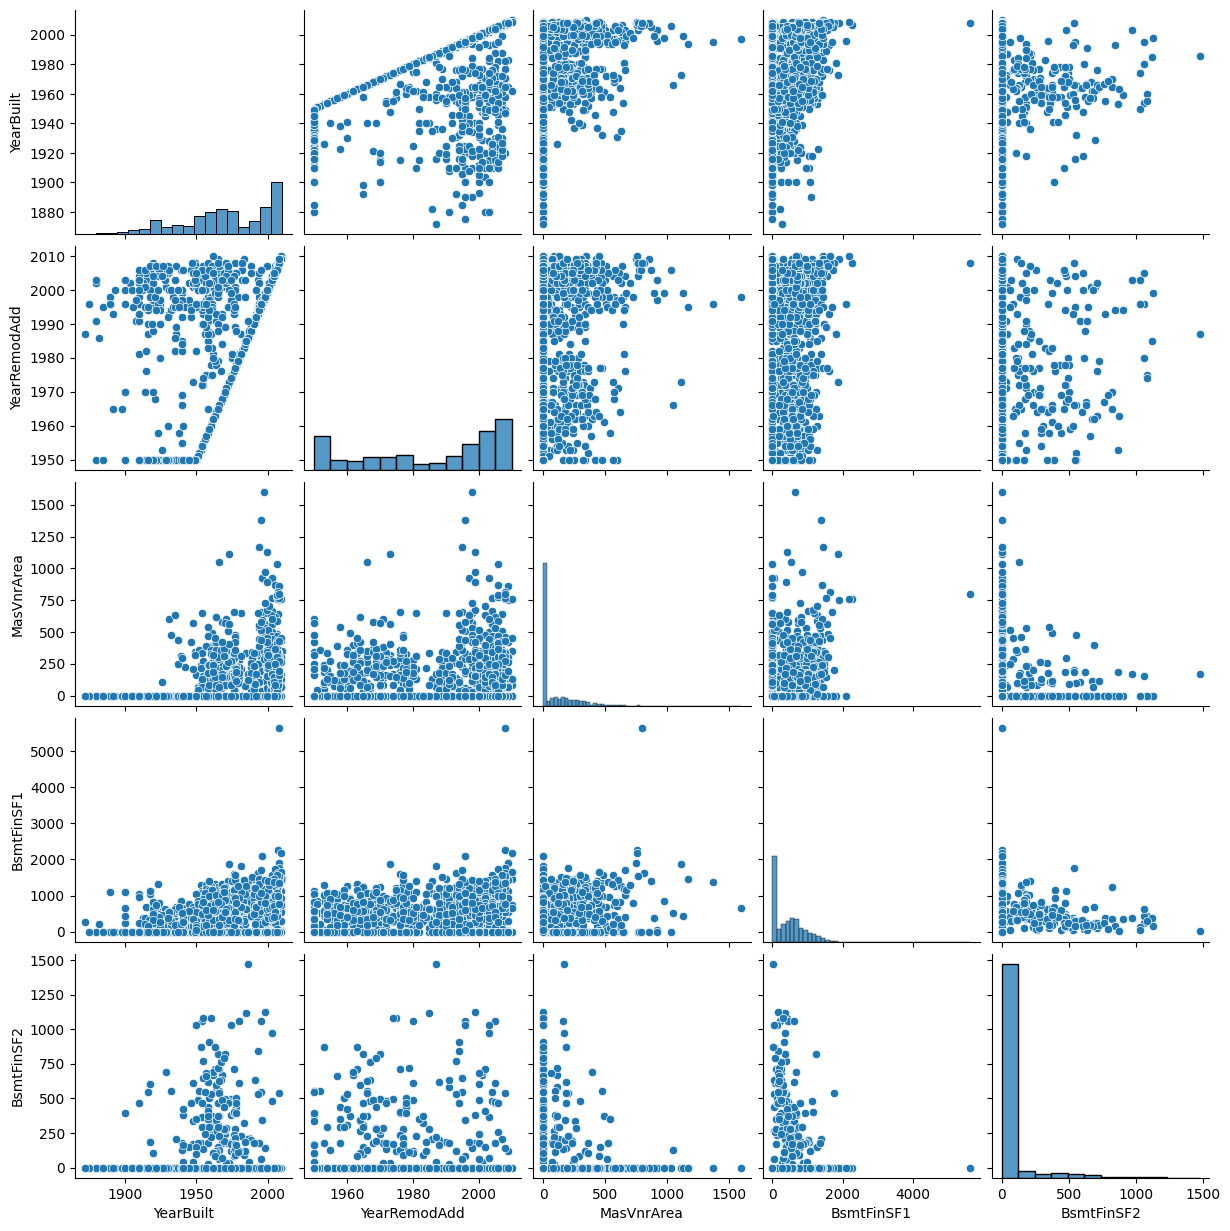

In [36]:
sns.pairplot(dataset[numerical_5])
plt.show()

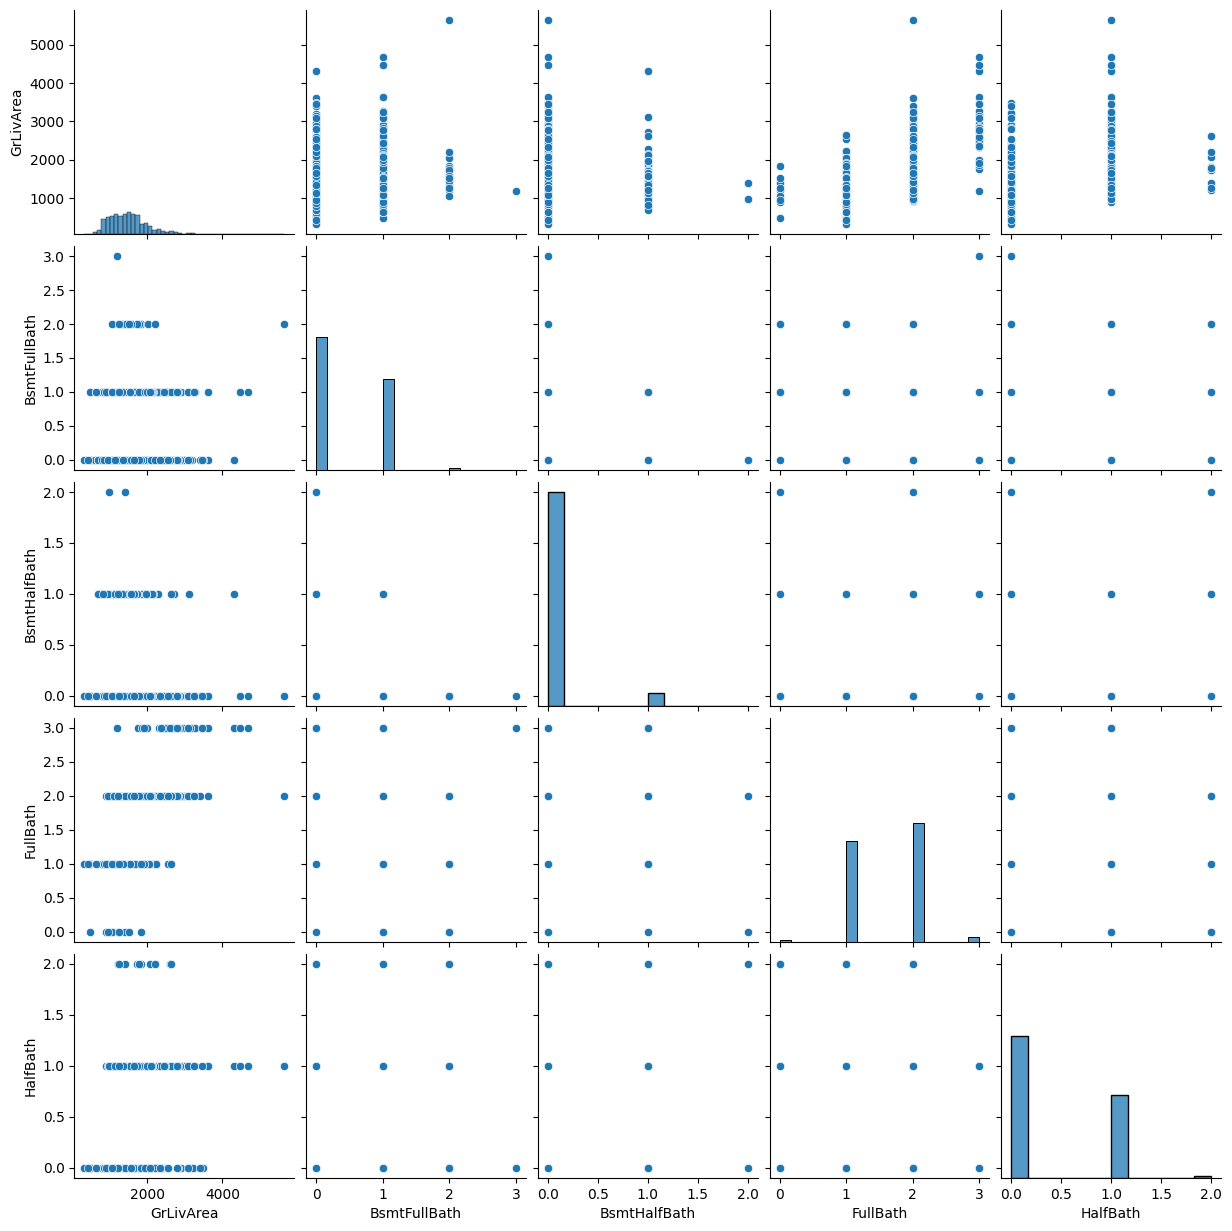

In [37]:
sns.pairplot(dataset[numerical_6])
plt.show()

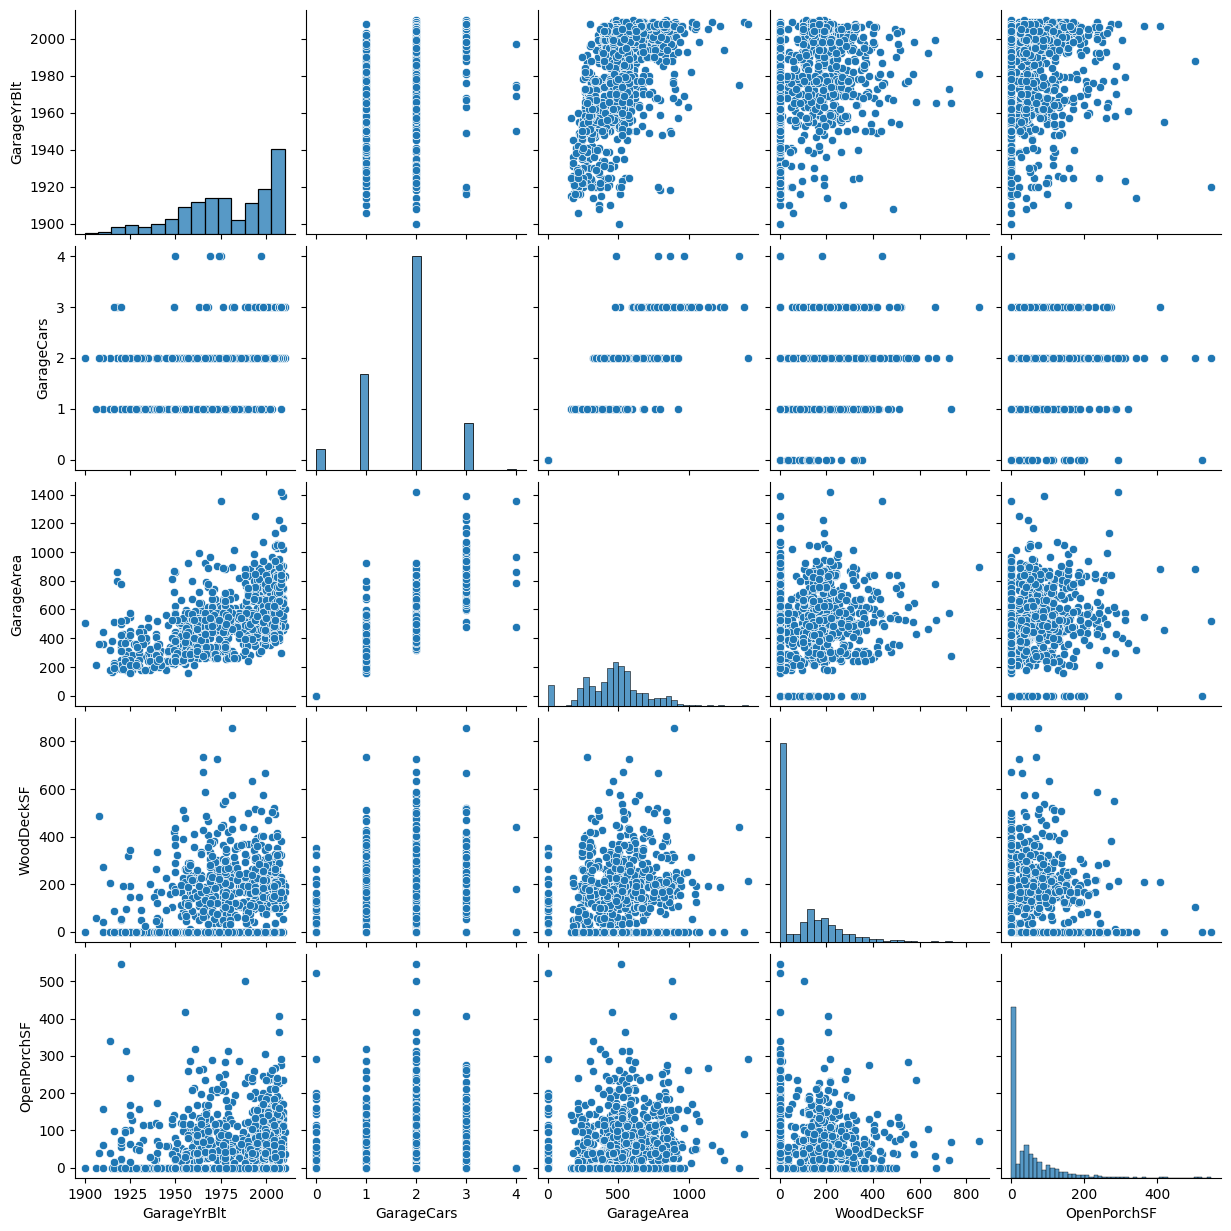

In [38]:
sns.pairplot(dataset[numerical_7])
plt.show()

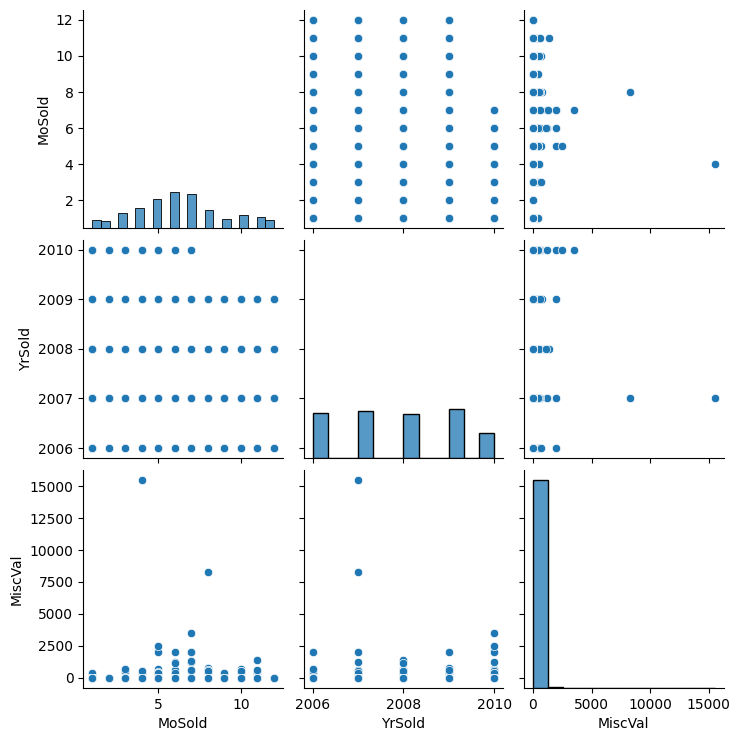

In [39]:
sns.pairplot(dataset[numerical_8])
plt.show()

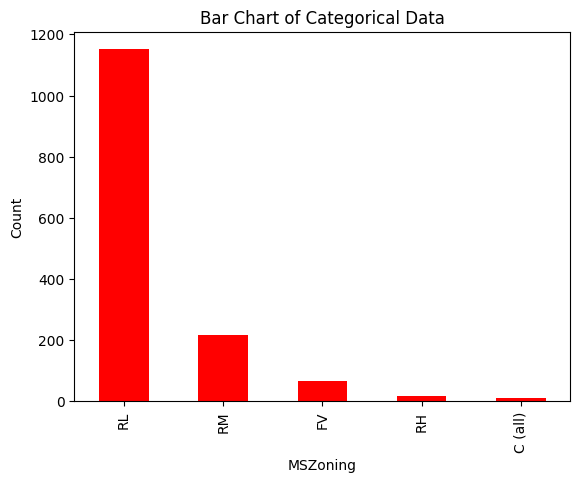

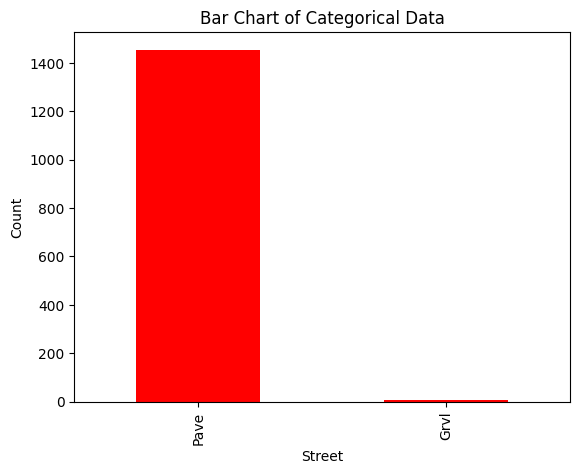

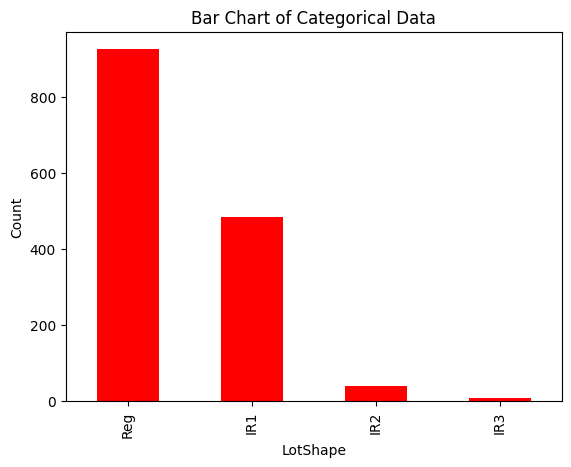

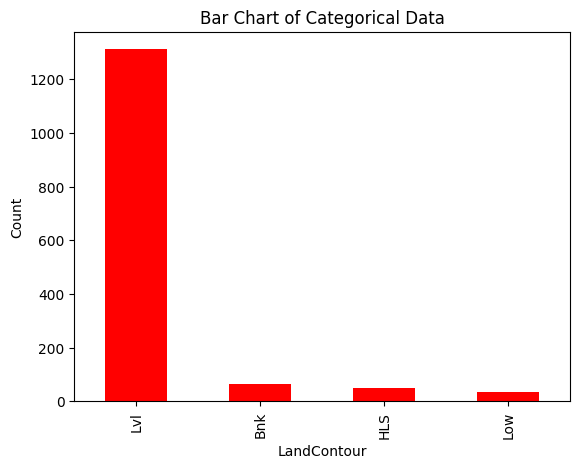

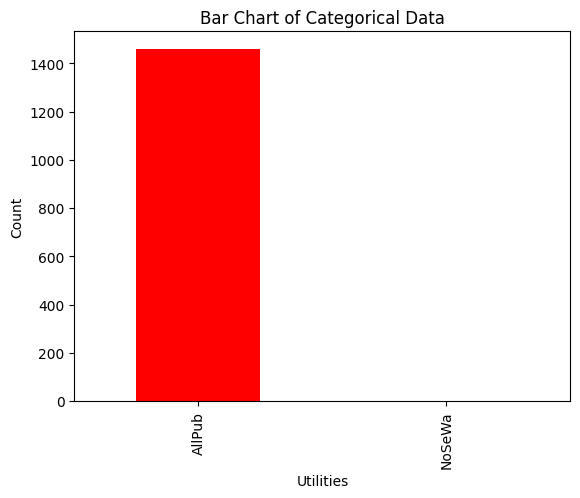

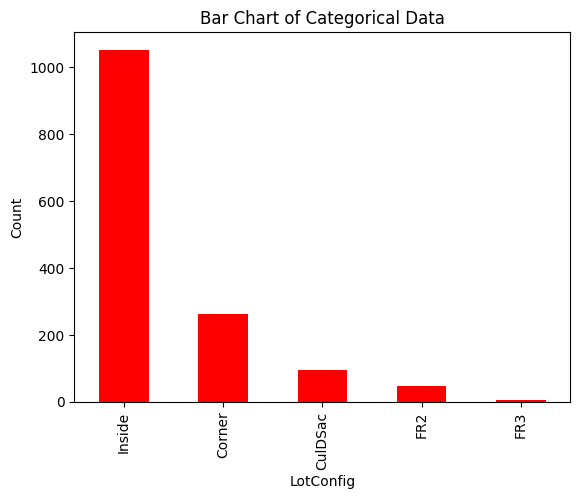

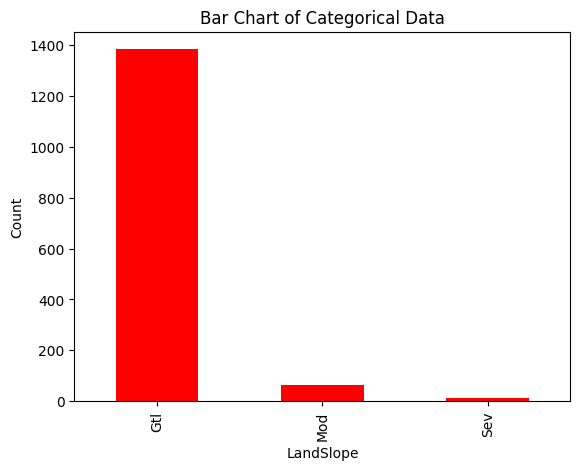

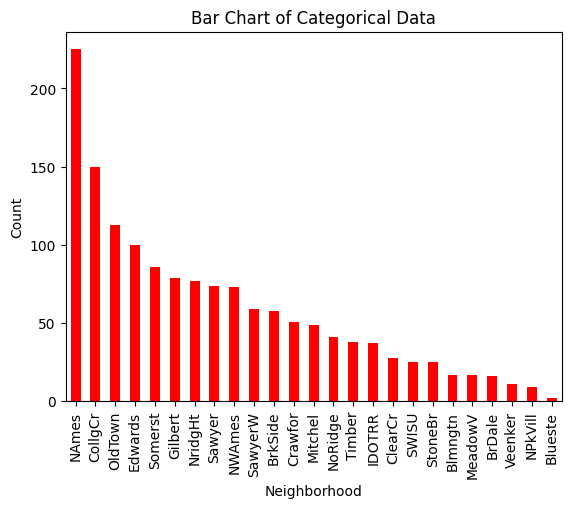

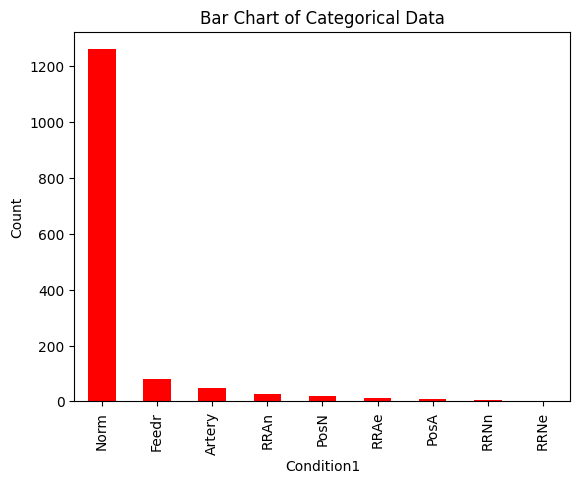

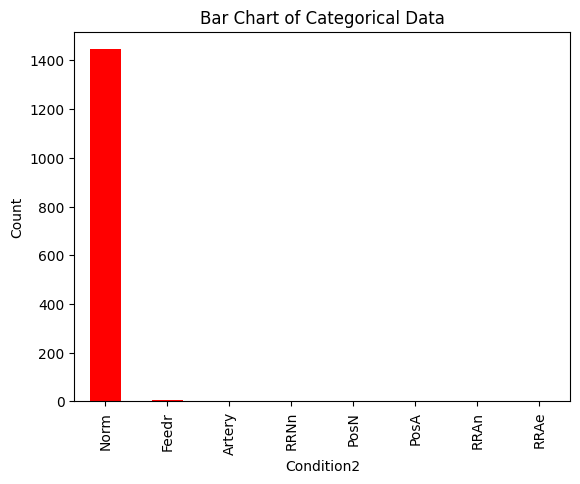

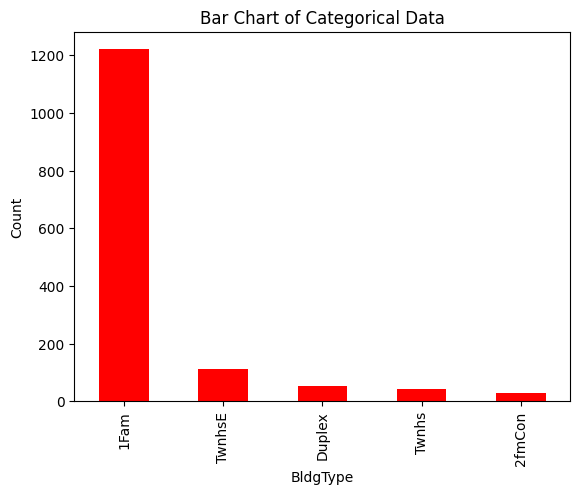

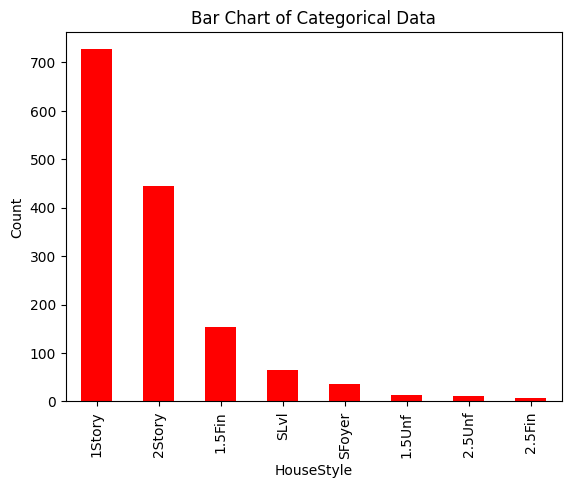

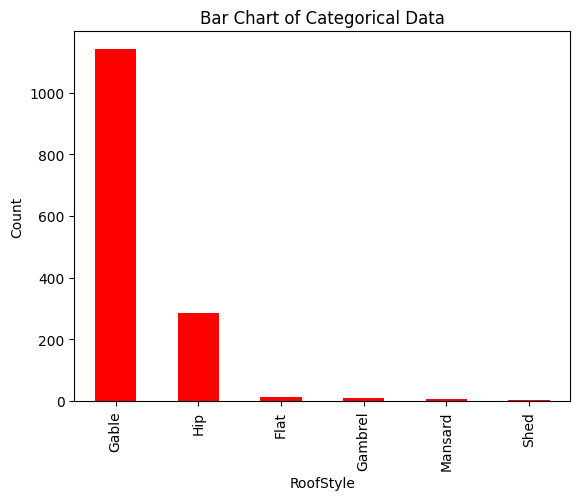

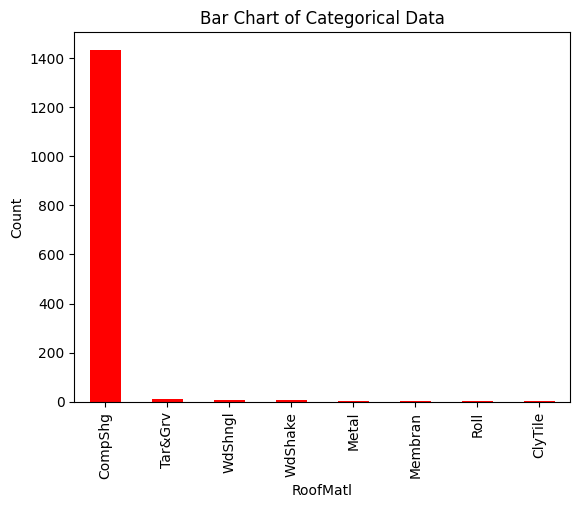

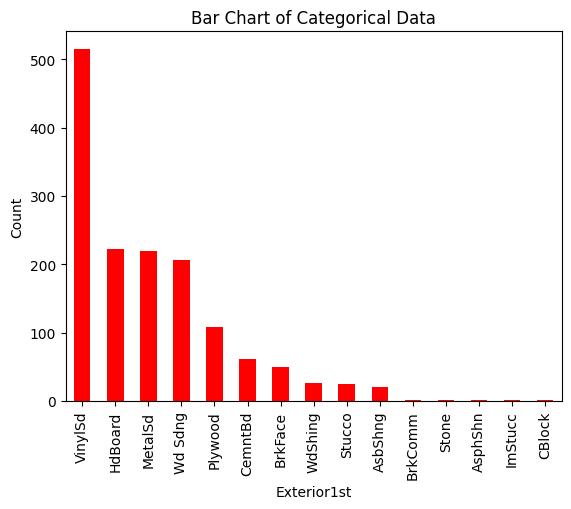

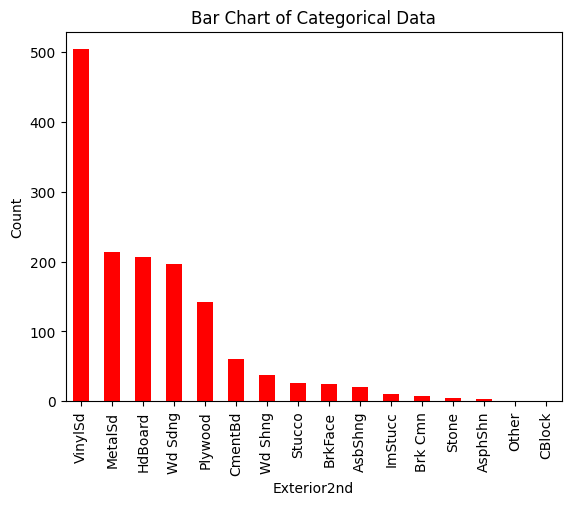

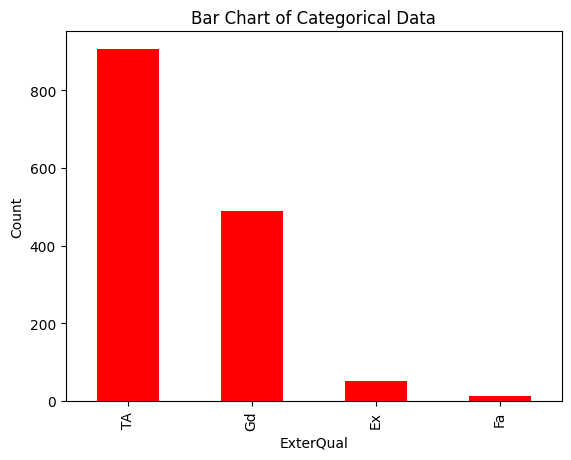

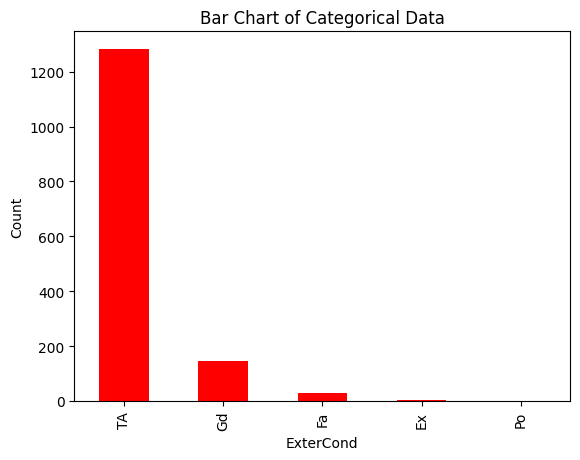

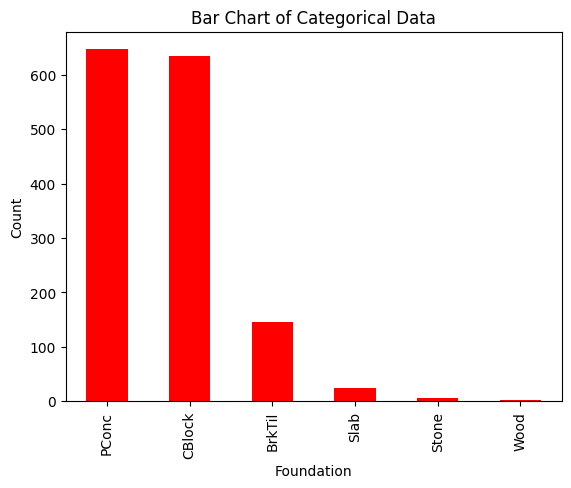

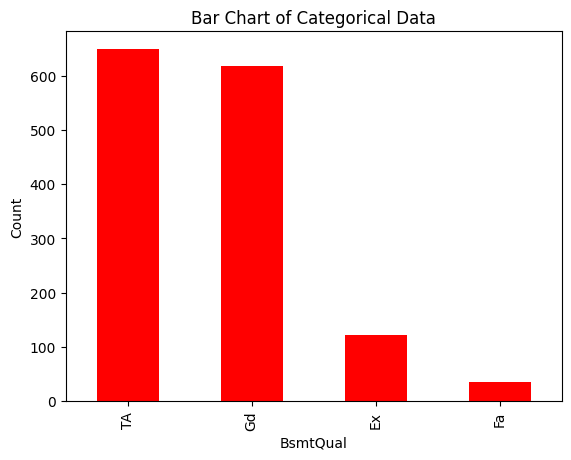

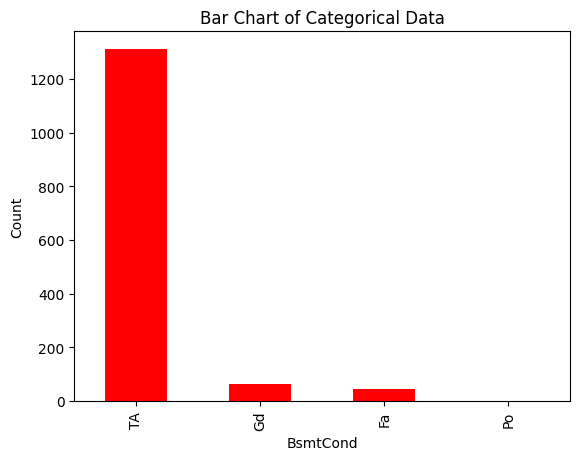

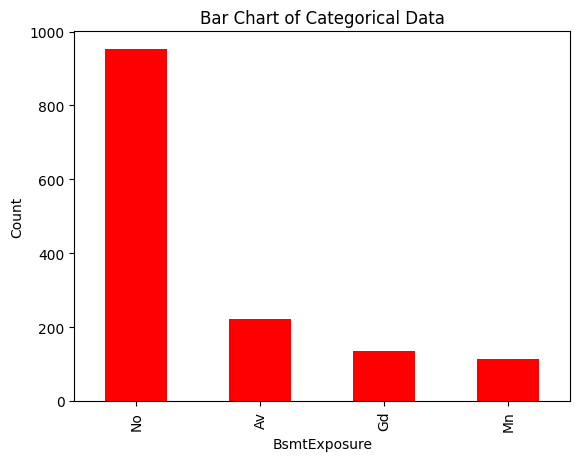

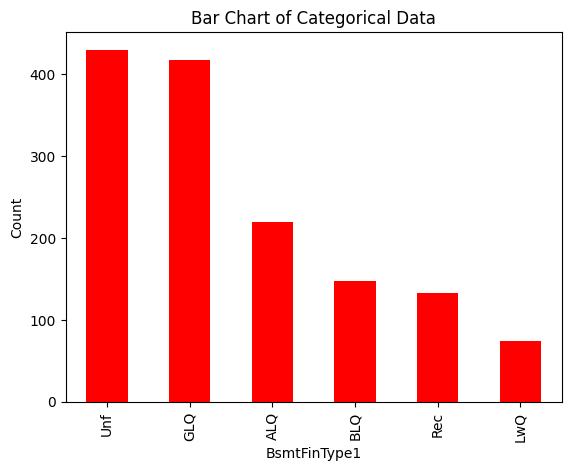

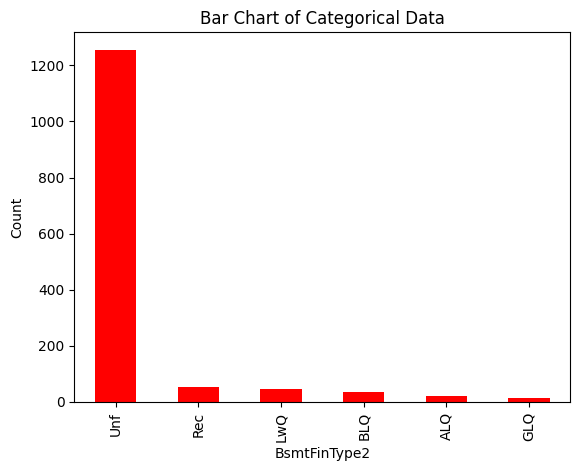

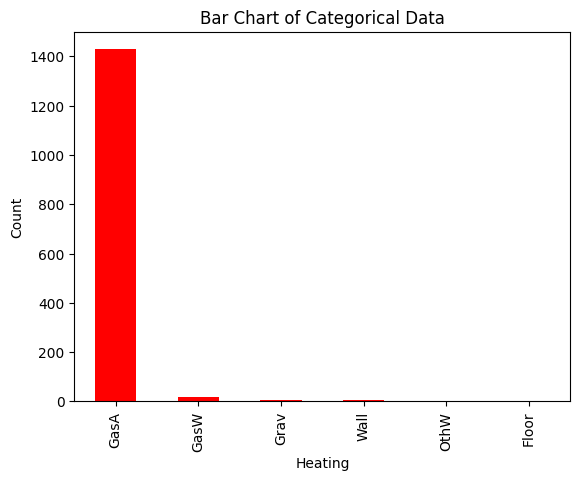

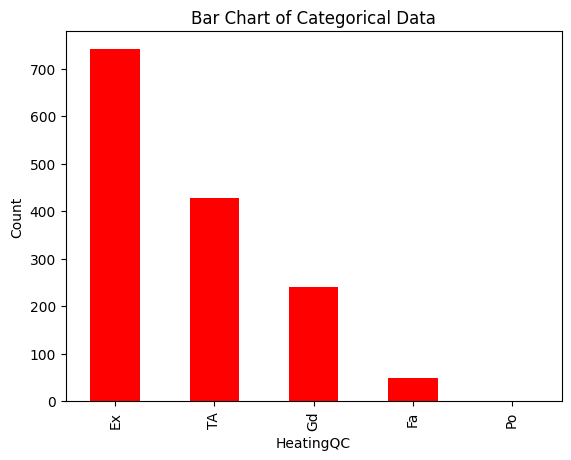

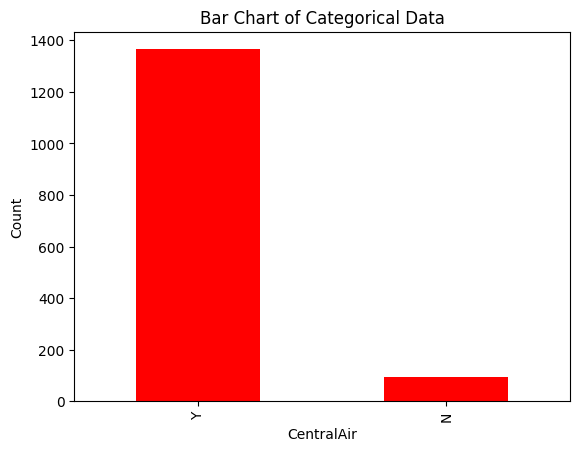

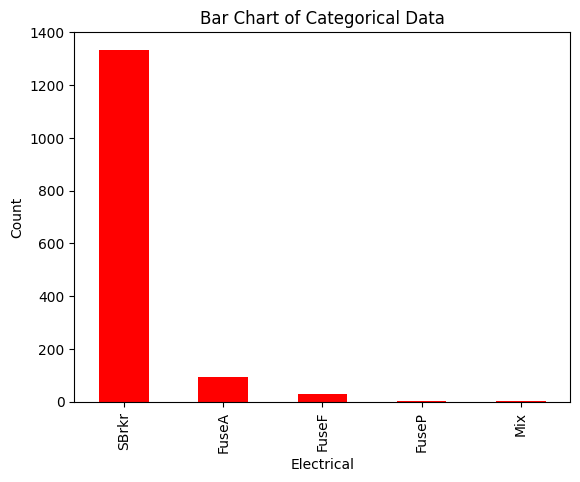

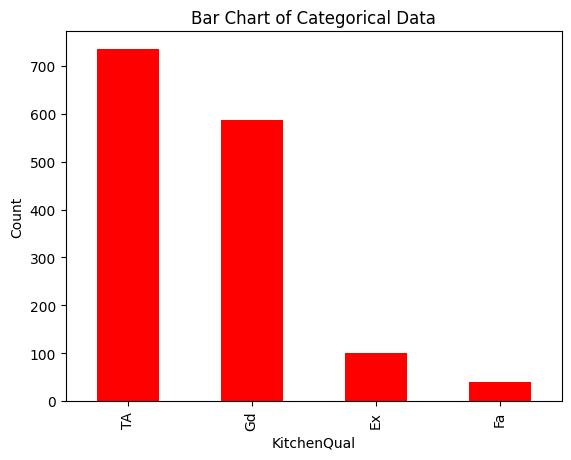

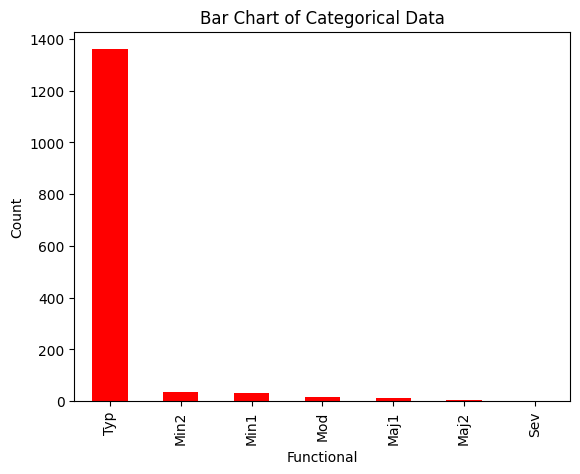

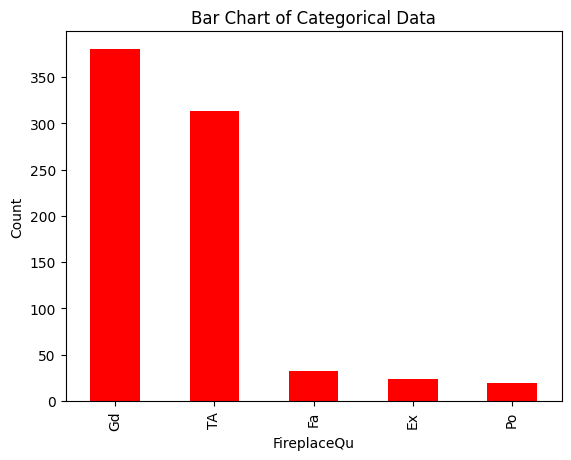

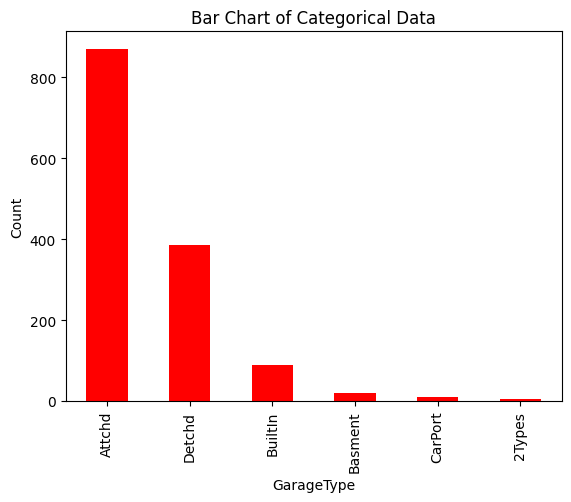

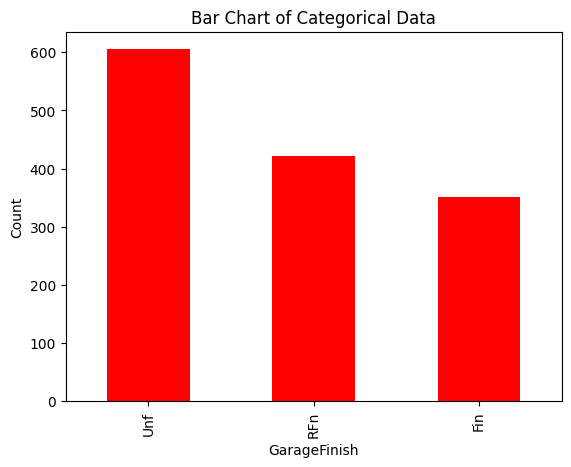

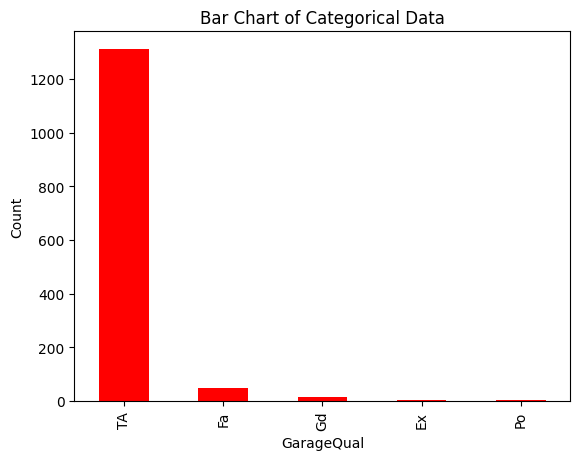

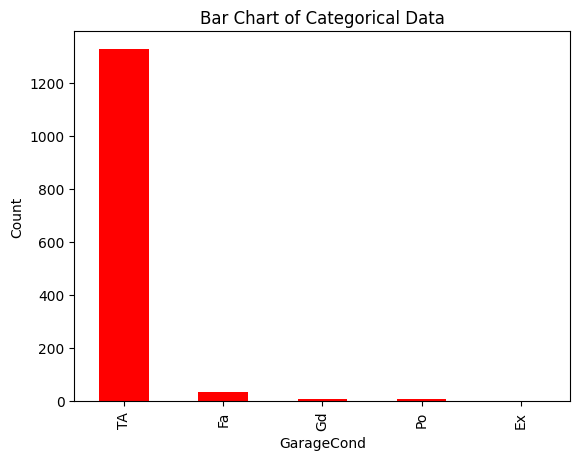

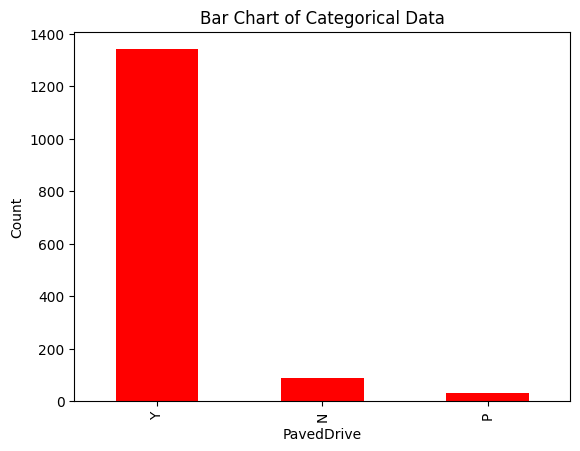

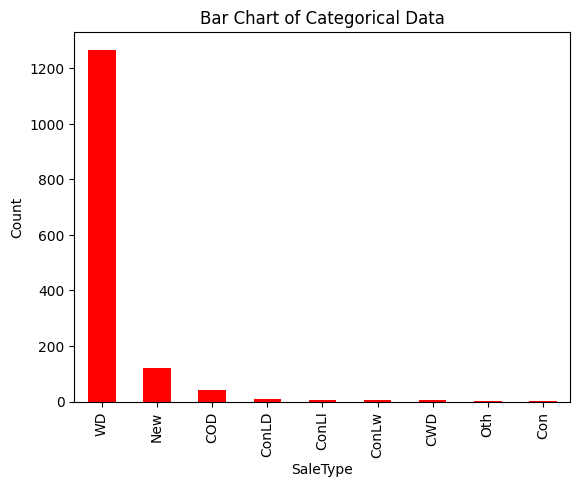

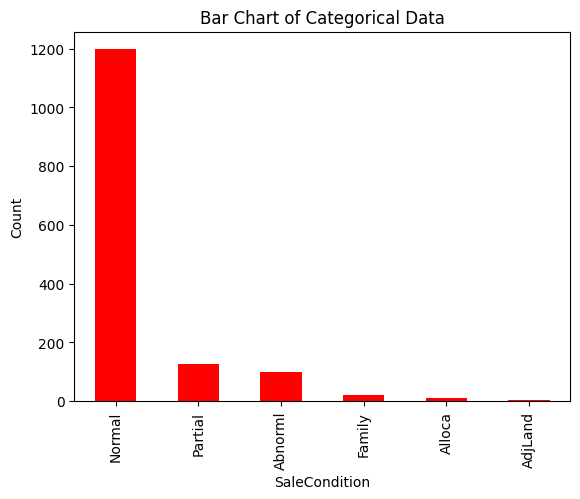

In [40]:
for feature in categorical_features:
    dataset[feature].value_counts().plot(kind='bar',color='red')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Bar Chart of Categorical Data')
    plt.show()

In [41]:
## Seperating Target columns from the rest of dataset 
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [42]:
## imputing NaN amounts with mean and mode recpectivly in numerical and categorical features
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(numerical_dataset)
numerical_dataset = imputer.transform(numerical_dataset)

In [43]:
numerical_mean_imputed = pd.DataFrame(numerical_dataset, columns=numerical_features)

In [44]:
numerical_mean_imputed.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        60.0         65.0   8450.0          7.0          5.0     2003.0   
1        20.0         80.0   9600.0          6.0          8.0     1976.0   
2        60.0         68.0  11250.0          7.0          5.0     2001.0   
3        70.0         60.0   9550.0          7.0          5.0     1915.0   
4        60.0         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0        2003.0       196.0       706.0         0.0      150.0        856.0   
1        1976.0         0.0       978.0         0.0      284.0       1262.0   
2        2002.0       162.0       486.0         0.0      434.0        920.0   
3        1970.0         0.0       216.0         0.0      540.0        756.0   
4        2000.0       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0     856.0     854.0           0.0     1710.0           1.0           0.0   
1    1262.0       0.0           0.0     1262.0           0.0           1.0   
2     920.0     866.0           0.0     1786.0           1.0           0.0   
3     961.0     756.0           0.0     1717.0           1.0           0.0   
4    1145.0    1053.0           0.0     2198.0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0       2.0       1.0           3.0           1.0           8.0         0.0   
1       2.0       0.0           3.0           1.0           6.0         1.0   
2       2.0       1.0           3.0           1.0           6.0         1.0   
3       1.0       0.0           3.0           1.0           7.0         1.0   
4       2.0       1.0           4.0           1.0           9.0         1.0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0         2.0       548.0         0.0         61.0   
1       1976.0         2.0       460.0       298.0          0.0   
2       2001.0         2.0       608.0         0.0         42.0   
3       1998.0         3.0       642.0         0.0         35.0   
4       2000.0         3.0       836.0       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0            0.0        0.0          0.0       0.0      0.0     2.0  2008.0   
1            0.0        0.0          0.0       0.0      0.0     5.0  2007.0   
2            0.0        0.0          0.0       0.0      0.0     9.0  2008.0   
3          272.0        0.0          0.0       0.0      0.0     2.0  2006.0   
4            0.0        0.0          0.0       0.0      0.0    12.0  2008.0   

   SalePrice  
0   208500.0  
1   181500.0  
2   223500.0  
3   140000.0  
4   250000.0

In [45]:
numerical_mean_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   OverallQual    1460 non-null   float64
 4   OverallCond    1460 non-null   float64
 5   YearBuilt      1460 non-null   float64
 6   YearRemodAdd   1460 non-null   float64
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   float64
 9   BsmtFinSF2     1460 non-null   float64
 10  BsmtUnfSF      1460 non-null   float64
 11  TotalBsmtSF    1460 non-null   float64
 12  1stFlrSF       1460 non-null   float64
 13  2ndFlrSF       1460 non-null   float64
 14  LowQualFinSF   1460 non-null   float64
 15  GrLivArea      1460 non-null   float64
 16  BsmtFullBath   1460 non-null   float64
 17  BsmtHalfBath   1460 non-null   float64
 18  FullBath

In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(categorical_dataset)
categorical_dataset = imputer.transform(categorical_dataset)

In [47]:
categorical_mode_imputed = pd.DataFrame(categorical_dataset, columns=categorical_features)

In [48]:
categorical_mode_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

In [49]:
## Label Encoding the categorical features 
from sklearn.preprocessing import LabelEncoder

In [50]:
label_encoder = LabelEncoder()
for col in categorical_features:
    categorical_mode_imputed[col] = label_encoder.fit_transform(categorical_mode_imputed[col])

In [51]:
categorical_mode_imputed.head()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         3            3          0          4          0   
1         3       1         3            3          0          2          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          0          0   
4         3       1         0            3          0          2          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
0             5           2           2         0           5          1   
1            24           1           2         0           2          1   
2             5           2           2         0           5          1   
3             6           2           2         0           5          1   
4            15           2           2         0           5          1   

   RoofMatl  Exterior1st  Exterior2nd  ExterQual  ExterCond  Foundation  \
0         1           12           13          2          4           2   
1         1            8            8          3          4           1   
2         1           12           13          2          4           2   
3         1           13           15          3          4           0   
4         1           12           13          2          4           2   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  \
0         2         3             3             2             5        1   
1         2         3             1             0             5        1   
2         2         3             2             2             5        1   
3         3         1             3             0             5        1   
4         2         3             0             2             5        1   

   HeatingQC  CentralAir  Electrical  KitchenQual  Functional  FireplaceQu  \
0          0           1           4            2           6            2   
1          0           1           4            3           6            4   
2          0           1           4            2           6            4   
3          2           1           4            2           6            2   
4          0           1           4            2           6            4   

   GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  SaleType  \
0           1             1           4           4           2         8   
1           1             1           4           4           2         8   
2           1             1           4           4           2         8   
3           5             2           4           4           2         8   
4           1             1           4           4           2         8   

   SaleCondition  
0              4  
1              4  
2              4  
3              0  
4              4

In [52]:
## Plotting the Correlation Matirx of numerical data
subset1 = numerical_mean_imputed.iloc[:, :6]
subset2 = numerical_mean_imputed.iloc[:, 6:12]
subset3 = numerical_mean_imputed.iloc[:, 12:18]
subset4 = numerical_mean_imputed.iloc[:, 18:24]
subset5 = numerical_mean_imputed.iloc[:, 24:30]
subset6 = numerical_mean_imputed.iloc[:, 30:]

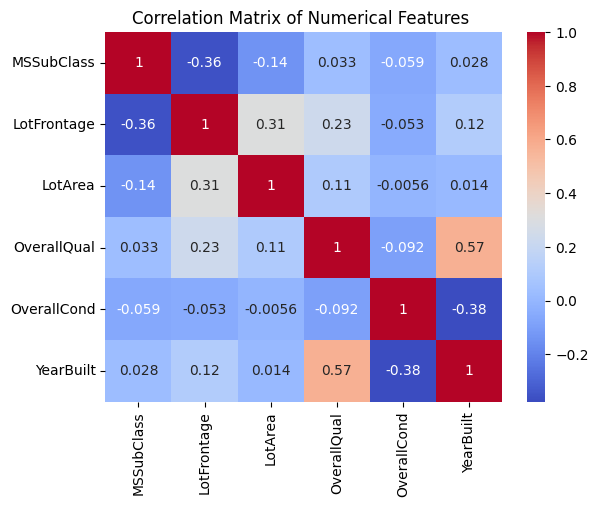

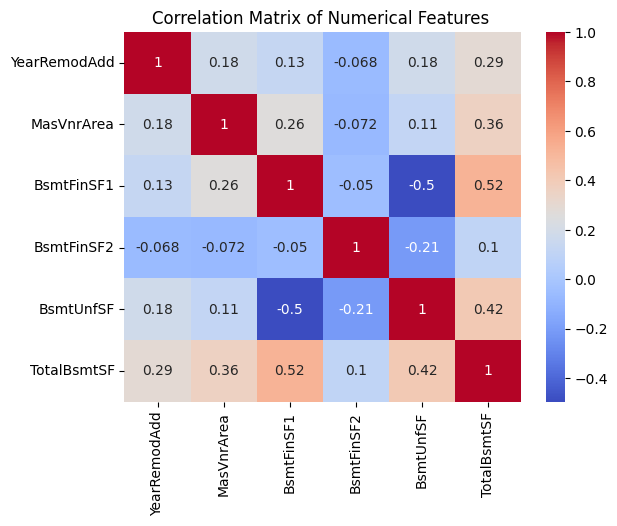

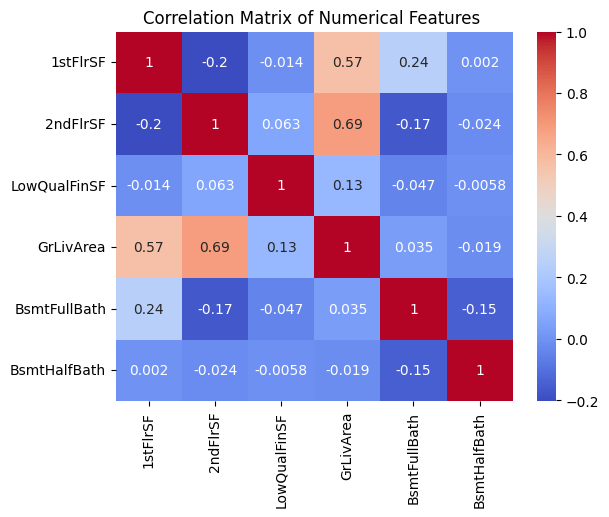

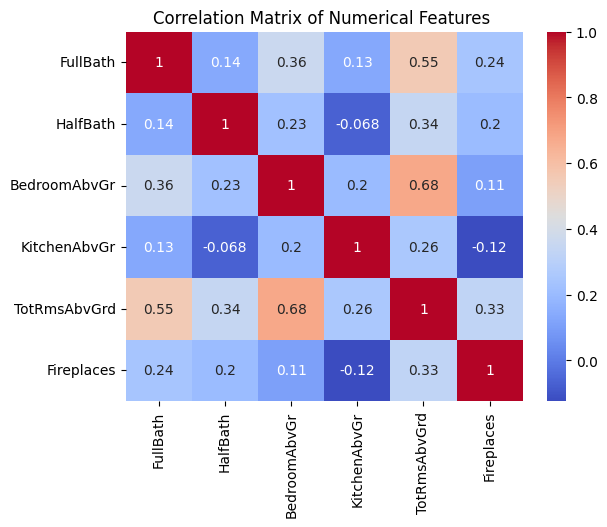

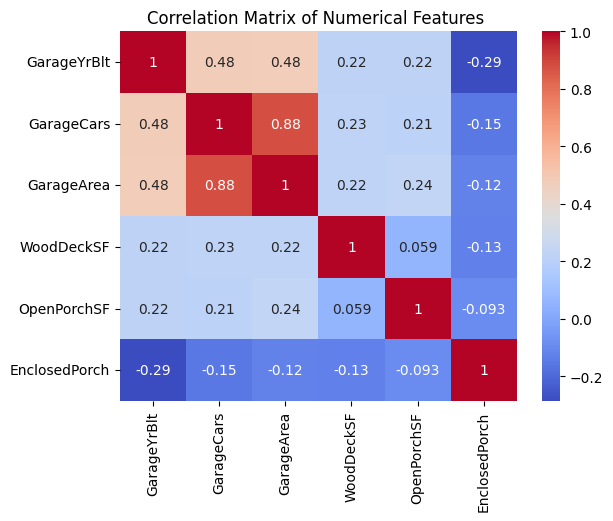

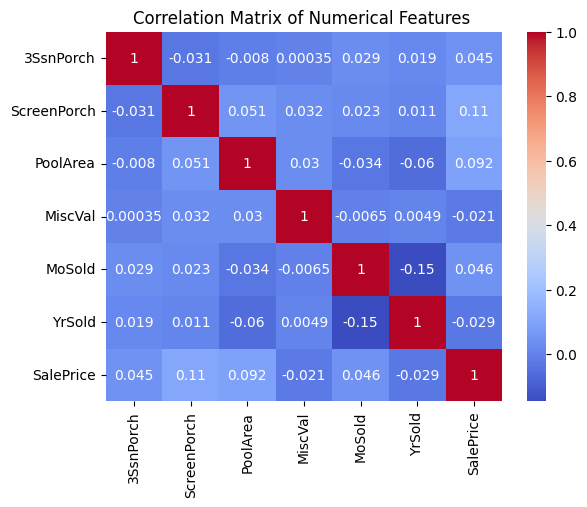

In [53]:
for subset in [subset1, subset2, subset3, subset4, subset5, subset6]:
    corr_matrix = subset.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Numerical Features ')
    plt.show()

In [54]:
## Plotting the Correlation Matrix of Encoded Categorical Features
subset1 = categorical_mode_imputed.iloc[:, :5]
subset2 = categorical_mode_imputed.iloc[:, 5:10]
subset3 = categorical_mode_imputed.iloc[:, 10:15]
subset4 = categorical_mode_imputed.iloc[:, 15:20]
subset5 = categorical_mode_imputed.iloc[:, 20:25]
subset6 = categorical_mode_imputed.iloc[:, 25:30]
subset7 = categorical_mode_imputed.iloc[:, 30:34]
subset8 = categorical_mode_imputed.iloc[:, 34:]

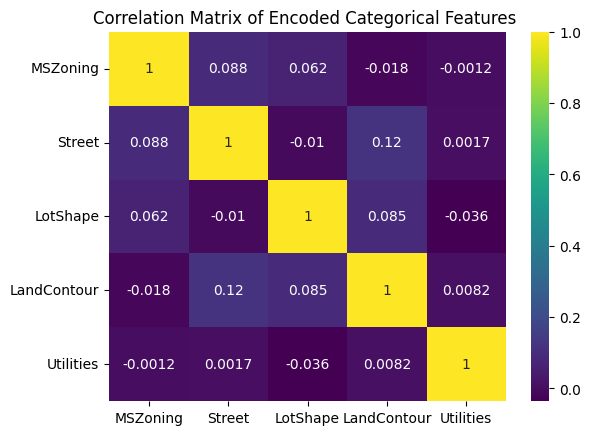

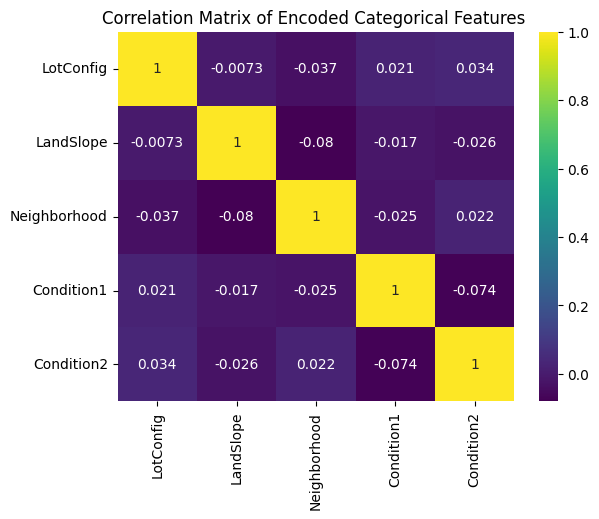

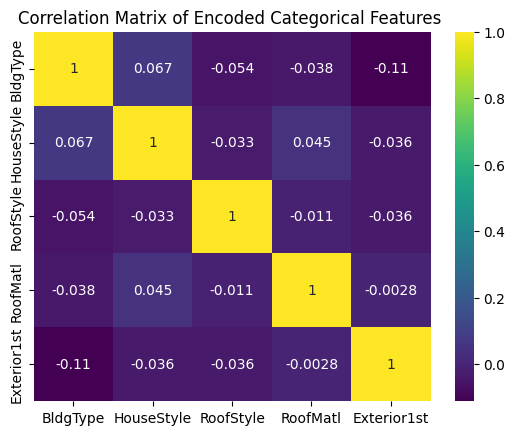

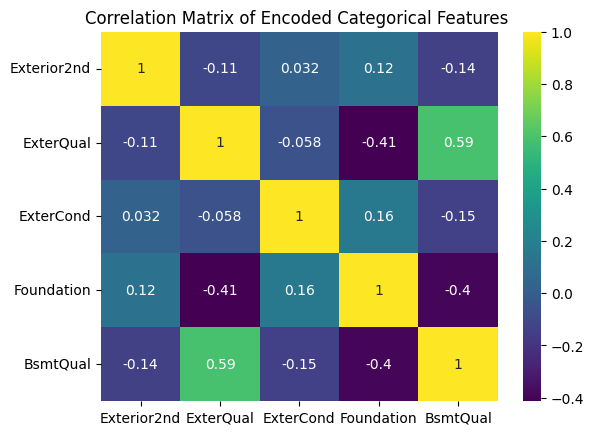

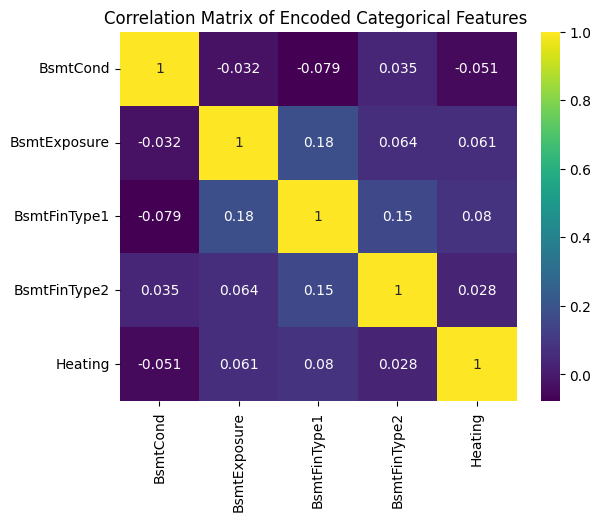

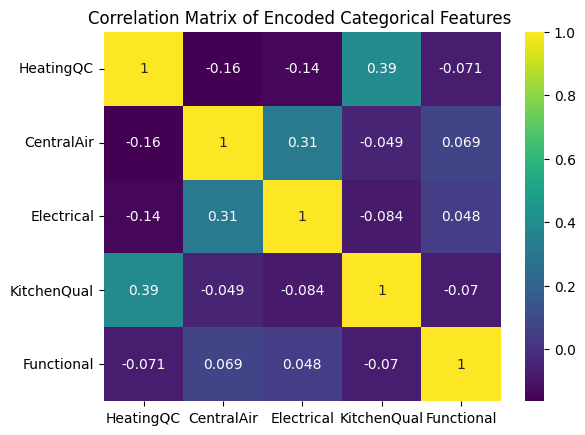

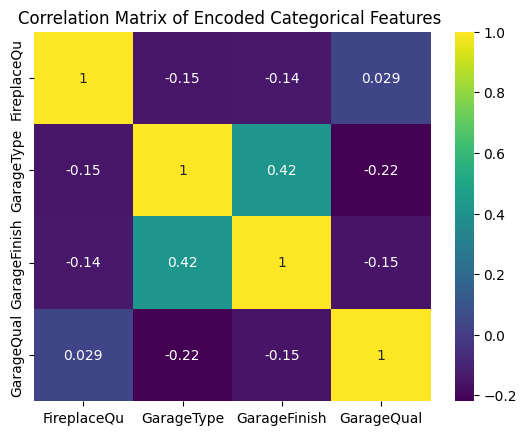

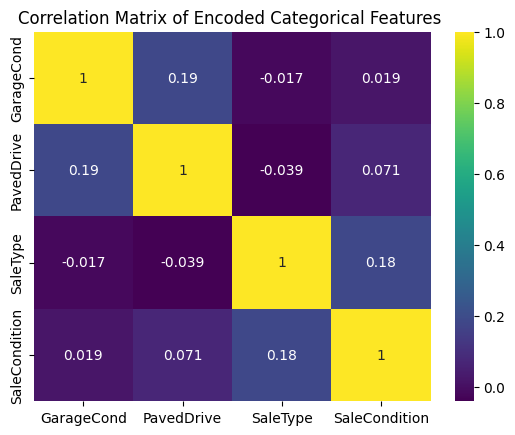

In [55]:
for subset in [subset1, subset2, subset3, subset4, subset5, subset6, subset7, subset8]:
    corr_matrix = subset.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='viridis')
    plt.title('Correlation Matrix of Encoded Categorical Features ')
    plt.show()

In [56]:
## Concatenate back the Encoded Categorical Data with the Numerical Data 
preprocessed_dataset = pd.concat([categorical_mode_imputed, numerical_mean_imputed], axis=1)

In [57]:
preprocessed_dataset.head()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         3            3          0          4          0   
1         3       1         3            3          0          2          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          0          0   
4         3       1         0            3          0          2          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
0             5           2           2         0           5          1   
1            24           1           2         0           2          1   
2             5           2           2         0           5          1   
3             6           2           2         0           5          1   
4            15           2           2         0           5          1   

   RoofMatl  Exterior1st  Exterior2nd  ExterQual  ExterCond  Foundation  \
0         1           12           13          2          4           2   
1         1            8            8          3          4           1   
2         1           12           13          2          4           2   
3         1           13           15          3          4           0   
4         1           12           13          2          4           2   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  \
0         2         3             3             2             5        1   
1         2         3             1             0             5        1   
2         2         3             2             2             5        1   
3         3         1             3             0             5        1   
4         2         3             0             2             5        1   

   HeatingQC  CentralAir  Electrical  KitchenQual  Functional  FireplaceQu  \
0          0           1           4            2           6            2   
1          0           1           4            3           6            4   
2          0           1           4            2           6            4   
3          2           1           4            2           6            2   
4          0           1           4            2           6            4   

   GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  SaleType  \
0           1             1           4           4           2         8   
1           1             1           4           4           2         8   
2           1             1           4           4           2         8   
3           5             2           4           4           2         8   
4           1             1           4           4           2         8   

   SaleCondition  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0              4        60.0         65.0   8450.0          7.0          5.0   
1              4        20.0         80.0   9600.0          6.0          8.0   
2              4        60.0         68.0  11250.0          7.0          5.0   
3              0        70.0         60.0   9550.0          7.0          5.0   
4              4        60.0         84.0  14260.0          8.0          5.0   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     2003.0        2003.0       196.0       706.0         0.0      150.0   
1     1976.0        1976.0         0.0       978.0         0.0      284.0   
2     2001.0        2002.0       162.0       486.0         0.0      434.0   
3     1915.0        1970.0         0.0       216.0         0.0      540.0   
4     2000.0        2000.0       350.0       655.0         0.0      490.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        856.0     856.0     854.0           0.0     1710.0           1.0   
1       1262.0    1262.0       0.0           0.0     1262.0           0.0   
2        920.0     920.0     866.0           0.0     178

In [58]:
preprocessed_dataset.shape

(1460, 75)

In [59]:
## implenting Multiple Linear Regression on the dataset 
M = preprocessed_dataset
X = M.iloc[:, :-1].values
y = M.iloc[:, -1].values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),axis=1))

[[ 214988.75  200624.  ]
 [ 173382.84  133000.  ]
 [ 104537.2   110000.  ]
 [ 215022.08  192000.  ]
 [  94078.1    88000.  ]
 [  77857.36   85000.  ]
 [ 237168.24  282922.  ]
 [ 139820.    141000.  ]
 [ 492943.77  745000.  ]
 [ 158297.5   148800.  ]
 [ 200295.57  208900.  ]
 [ -38106.84  136905.  ]
 [ 242978.97  225000.  ]
 [ 109996.82  123000.  ]
 [ 126857.34  119200.  ]
 [ 138129.46  145000.  ]
 [ 232901.09  190000.  ]
 [ 108131.19  123600.  ]
 [ 133137.52  149350.  ]
 [ 178260.95  155000.  ]
 [ 140579.7   166000.  ]
 [ 161419.7   144500.  ]
 [  77022.71  110000.  ]
 [ 148547.07  174000.  ]
 [ 203880.82  185000.  ]
 [ 197587.22  168000.  ]
 [ 174295.79  177500.  ]
 [  61551.12   84500.  ]
 [ 348906.78  320000.  ]
 [ 109477.02  118500.  ]
 [ 134585.94  110000.  ]
 [ 216324.76  213000.  ]
 [ 147439.54  156000.  ]
 [ 282166.83  250000.  ]
 [ 308954.31  372500.  ]
 [ 183134.99  175000.  ]
 [ 307481.07  277500.  ]
 [ 107006.92  112500.  ]
 [ 228192.75  263000.  ]
 [ 340448.45  325000.  ]


In [63]:
N = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),axis=1)
n = pd.DataFrame(N, columns=['y_pred', 'y_test'])

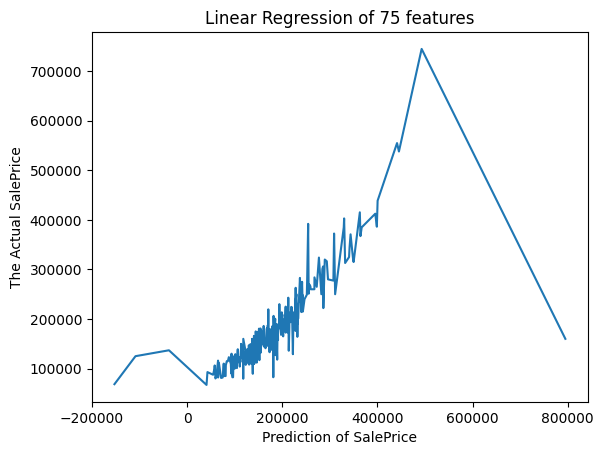

In [64]:
sns.lineplot(data=n, x='y_pred', y='y_test')
plt.title('Linear Regression of 75 features')
plt.xlabel('Prediction of SalePrice')
plt.ylabel('The Actual SalePrice')
plt.show()

In [65]:
## Measuring the feature importance of the dataset's features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x = preprocessed_dataset.iloc[:, :-1]
y = preprocessed_dataset.iloc[:, -1]

In [66]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [67]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [68]:
feature_names = x.columns.tolist()
forest_importances = pd.Series(importances,index=feature_names)
importance_dataset = pd.DataFrame(forest_importances)
importance_dataset.transpose()

MSZoning    Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0  0.007645  0.000646  0.010845     0.005914    0.00009   0.010921   0.004111   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
0       0.02442    0.009211    0.000751   0.00552    0.010831   0.009302   

   RoofMatl  Exterior1st  Exterior2nd  ExterQual  ExterCond  Foundation  \
0  0.001471     0.018449     0.019916   0.006798   0.005633    0.009079   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2   Heating  \
0  0.008715  0.005045      0.012086      0.016051      0.007315  0.001802   

   HeatingQC  CentralAir  Electrical  KitchenQual  Functional  FireplaceQu  \
0   0.011363    0.002549    0.004501     0.009699    0.005462     0.011253   

   GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  SaleType  \
0    0.008536      0.011498    0.003149    0.002578    0.003739  0.007615   

   SaleCondition  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0       0.008195    0.013901     0.034092  0.038897     0.019176     0.015598   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   0.032994      0.029036    0.021466    0.029499     0.00907   0.035796   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0     0.036733  0.037394  0.019676      0.002239   0.038834      0.009069   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0      0.003474  0.007676  0.006945      0.014243      0.001786      0.021058   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0    0.012859     0.030337    0.009376     0.03712    0.024634     0.026402   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
0       0.009003   0.002837       0.0079  0.000712  0.004902  0.030988   

     YrSold  
0  0.021572

In [69]:
## removing features with the importance lesser than the mean amount of importance 
importance_dataset.describe()

0
count  74.000000
mean    0.013514
std     0.011128
min     0.000090
25%     0.005477
50%     0.009256
75%     0.019856
max     0.038897

In [70]:
importance_dataset.rename(columns={importance_dataset.columns[0]: 'Importance'}, inplace=True)

In [71]:
for index, row in importance_dataset.iterrows():
    if row['Importance'] < 0.013514:
        importance_dataset.drop(index, inplace=True)
importance_dataset.head()

Importance
Neighborhood    0.024420
Exterior1st     0.018449
Exterior2nd     0.019916
BsmtFinType1    0.016051
MSSubClass      0.013901

In [72]:
importance_dataset.shape

(26, 1)

In [73]:
important_features_list = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',	'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',	'OpenPorchSF', 'MoSold', 'YrSold']

In [74]:
preprocessed_dataset = preprocessed_dataset[important_features_list]
preprocessed_dataset.shape

(1460, 26)

In [75]:
preprocessed_dataset.head(10)

Neighborhood  Exterior1st  Exterior2nd  BsmtFinType1  MSSubClass  \
0             5           12           13             2        60.0   
1            24            8            8             0        20.0   
2             5           12           13             2        60.0   
3             6           13           15             0        70.0   
4            15           12           13             2        60.0   
5            11           12           13             2        50.0   
6            21           12           13             2        20.0   
7            14            6            6             0        60.0   
8            17            3           15             5        50.0   
9             3            8            8             2       190.0   

   LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    65.000000   8450.0          7.0          5.0     2003.0        2003.0   
1    80.000000   9600.0          6.0          8.0     1976.0        1976.0   
2    68.000000  11250.0          7.0          5.0     2001.0        2002.0   
3    60.000000   9550.0          7.0          5.0     1915.0        1970.0   
4    84.000000  14260.0          8.0          5.0     2000.0        2000.0   
5    85.000000  14115.0          5.0          5.0     1993.0        1995.0   
6    75.000000  10084.0          8.0          5.0     2004.0        2005.0   
7    70.049958  10382.0          7.0          6.0     1973.0        1973.0   
8    51.000000   6120.0          7.0          5.0     1931.0        1950.0   
9    50.000000   7420.0          5.0          6.0     1939.0        1950.0   

   MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0       196.0       706.0      150.0        856.0     856.0     854.0   
1         0.0       978.0      284.0       1262.0    1262.0       0.0   
2       162.0       486.0      434.0        920.0     920.0     866.0   
3         0.0       216.0      540.0        756.0     961.0     756.0   
4       350.0       655.0      490.0       1145.0    1145.0    1053.0   
5         0.0       732.0       64.0        796.0     796.0     566.0   
6       186.0      1369.0      317.0       1686.0    1694.0       0.0   
7       240.0       859.0      216.0       1107.0    1107.0     983.0   
8         0.0         0.0      952.0        952.0    1022.0     752.0   
9         0.0       851.0      140.0        991.0    1077.0       0.0   

   GrLivArea  BedroomAbvGr  TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  \
0     1710.0           3.0           8.0       2003.0       548.0         0.0   
1     1262.0           3.0           6.0       1976.0       460.0       298.0   
2     1786.0           3.0           6.0       2001.0       608.0         0.0   
3     1717.0           3.0           7.0       1998.0       642.0         0.0   
4     2198.0           4.0           9.0       2000.0       836.0       192.0   
5     1362.0           1.0           5.0       1993.0       480.0        40.0   
6     1694.0           3.0           7.0       2004.0       636.0       255.0   
7     2090.0           3.0           7.0       1973.0       484.0       235.0   
8     1774.0           2.0           8.0       1931.0       468.0        90.0   
9     1077.0           2.0           5.0       1939.0       205.0         0.0   

   OpenPorchSF  MoSold  YrSold  
0         61.0     2.0  2008.0  
1          0.0     5.0  2007.0  
2         42.0     9.0  2008.0  
3         35.0     2.0  2006.0  
4         84.0    12.0  2008.0  
5         30.0    10.0  2009.0  
6         57.0     8.0  2007.0  
7        204.0    11.0  2009.0  
8          0.0     4.0  2008.0  
9          4.0     1.0  2008.0

In [76]:
## Visualizing the correlation of remaining features
corr = preprocessed_dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

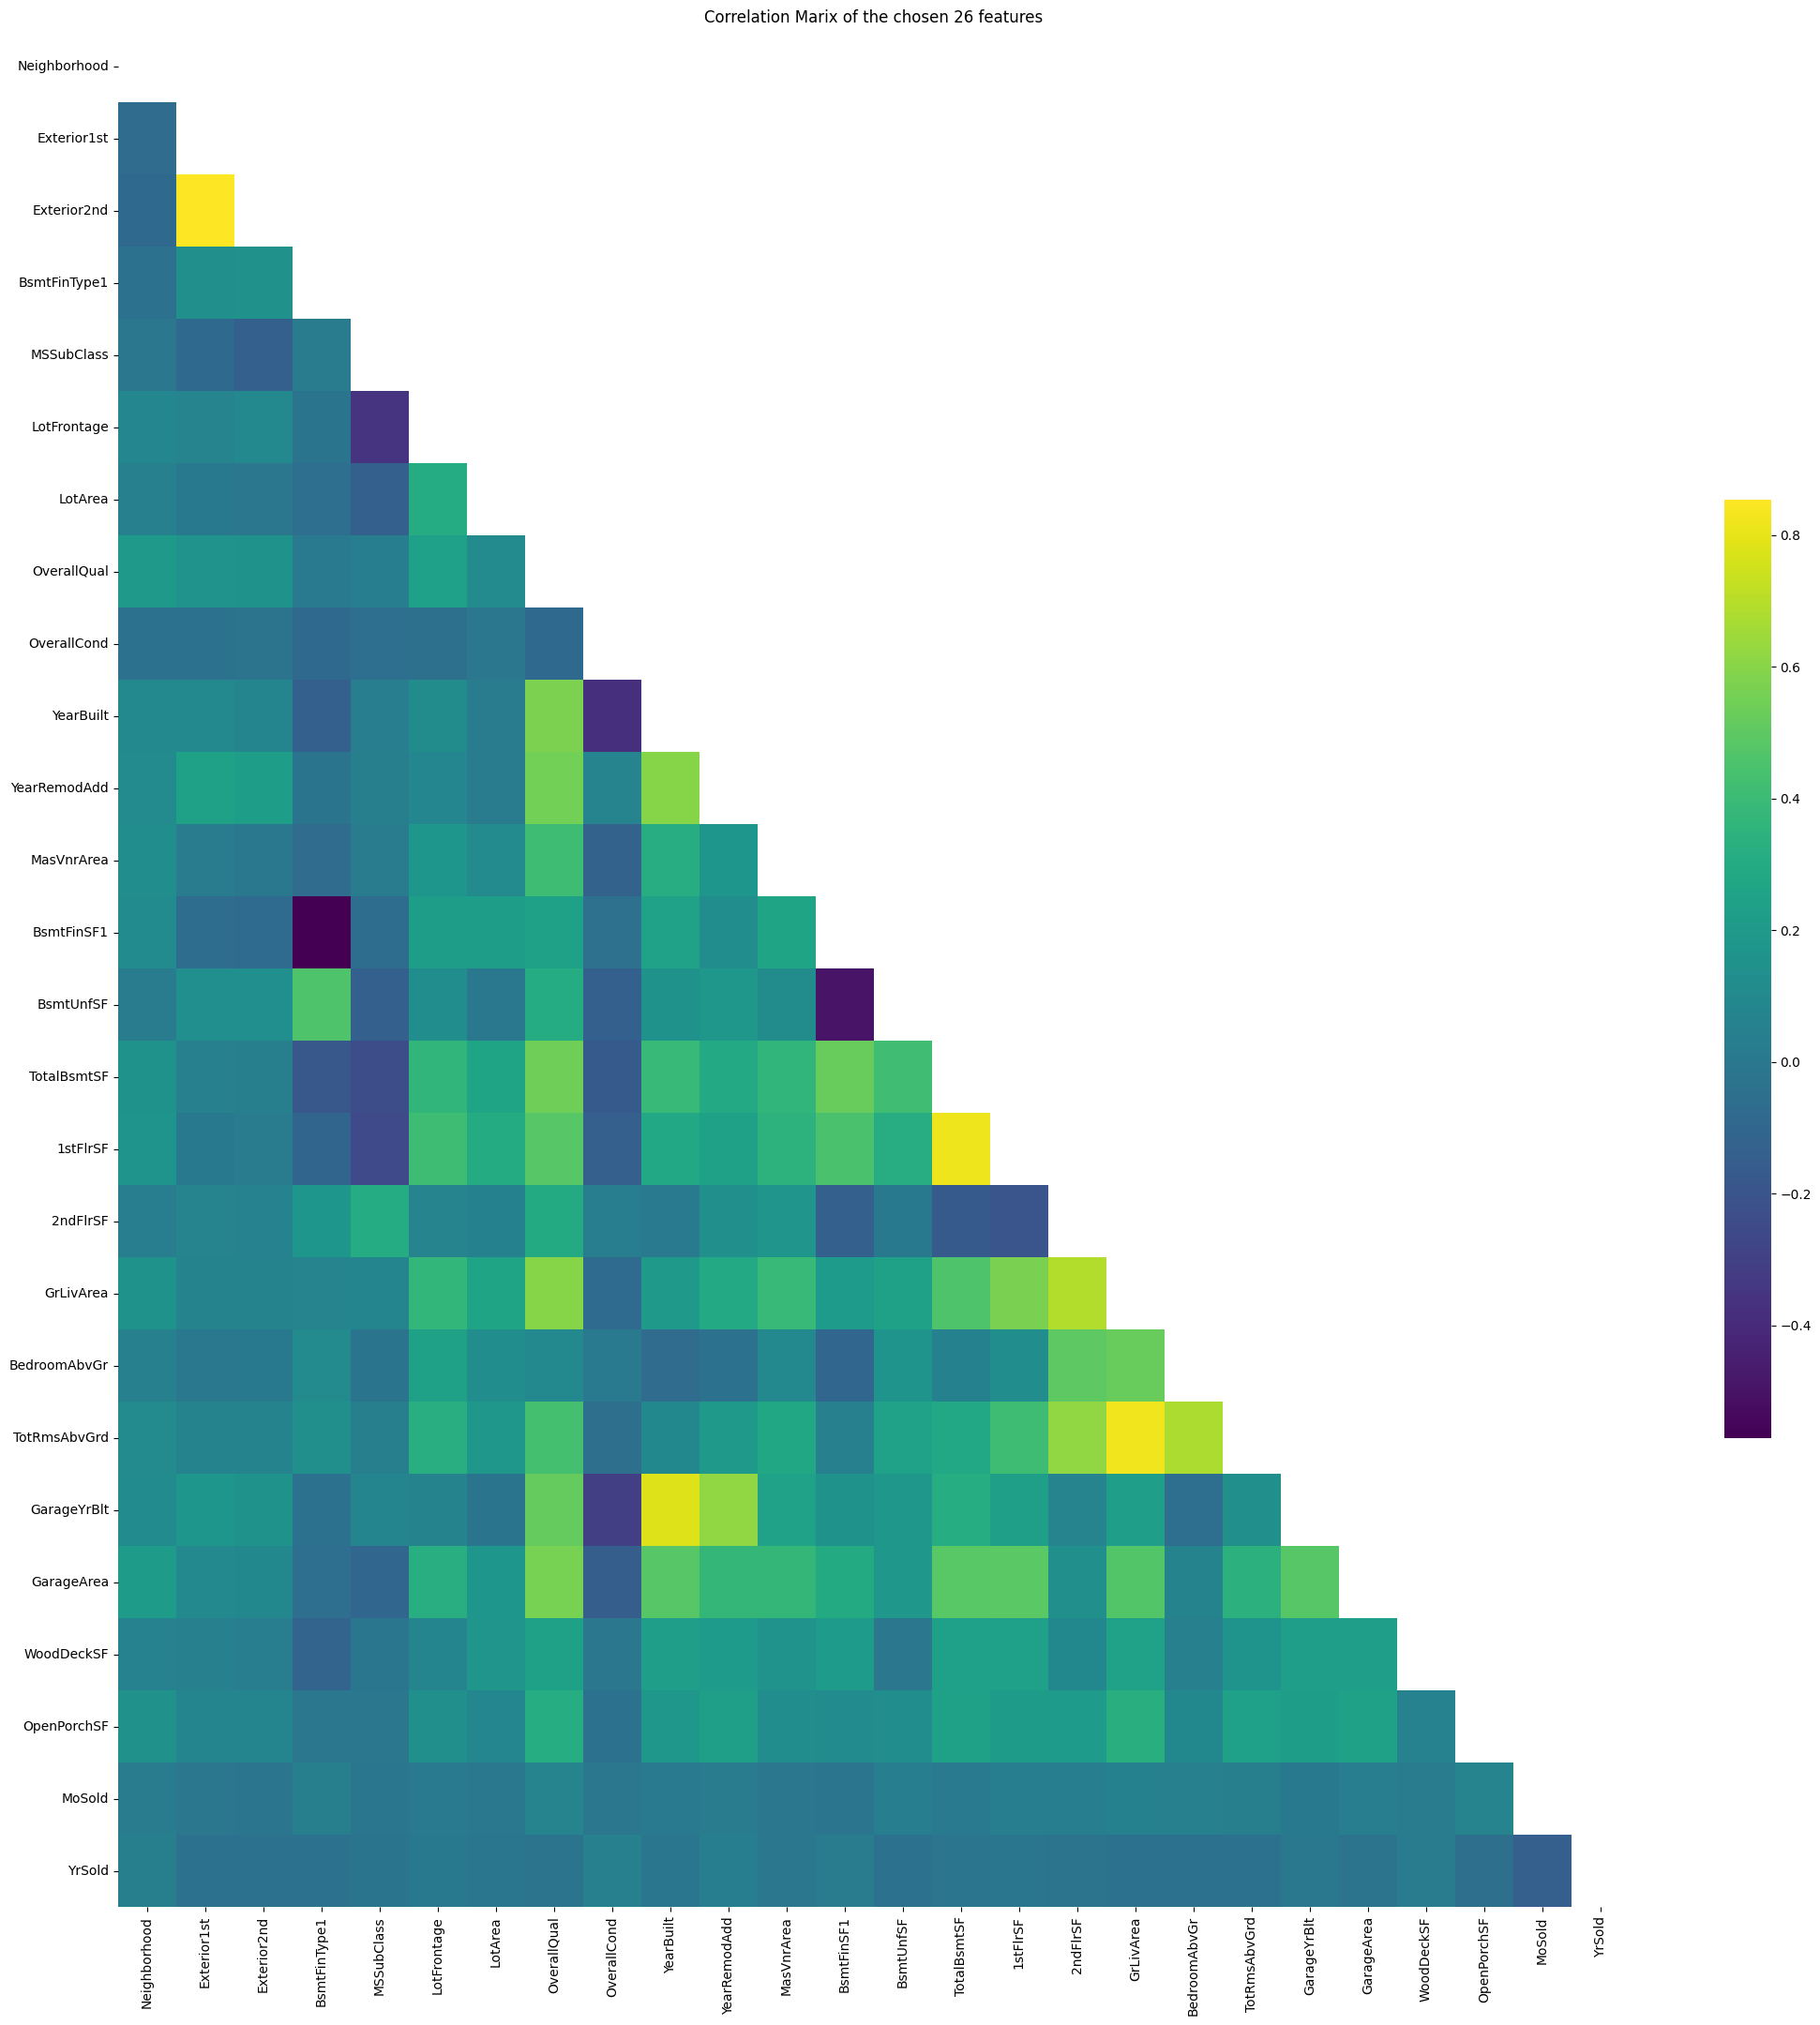

In [77]:
fig, ax = plt.subplots(figsize=(26, 26))
sns.heatmap(corr, mask=mask, annot=False, cmap='viridis', cbar_kws={'shrink': .5}, ax=ax)
plt.title('Correlation Marix of the chosen 26 features')
plt.show()

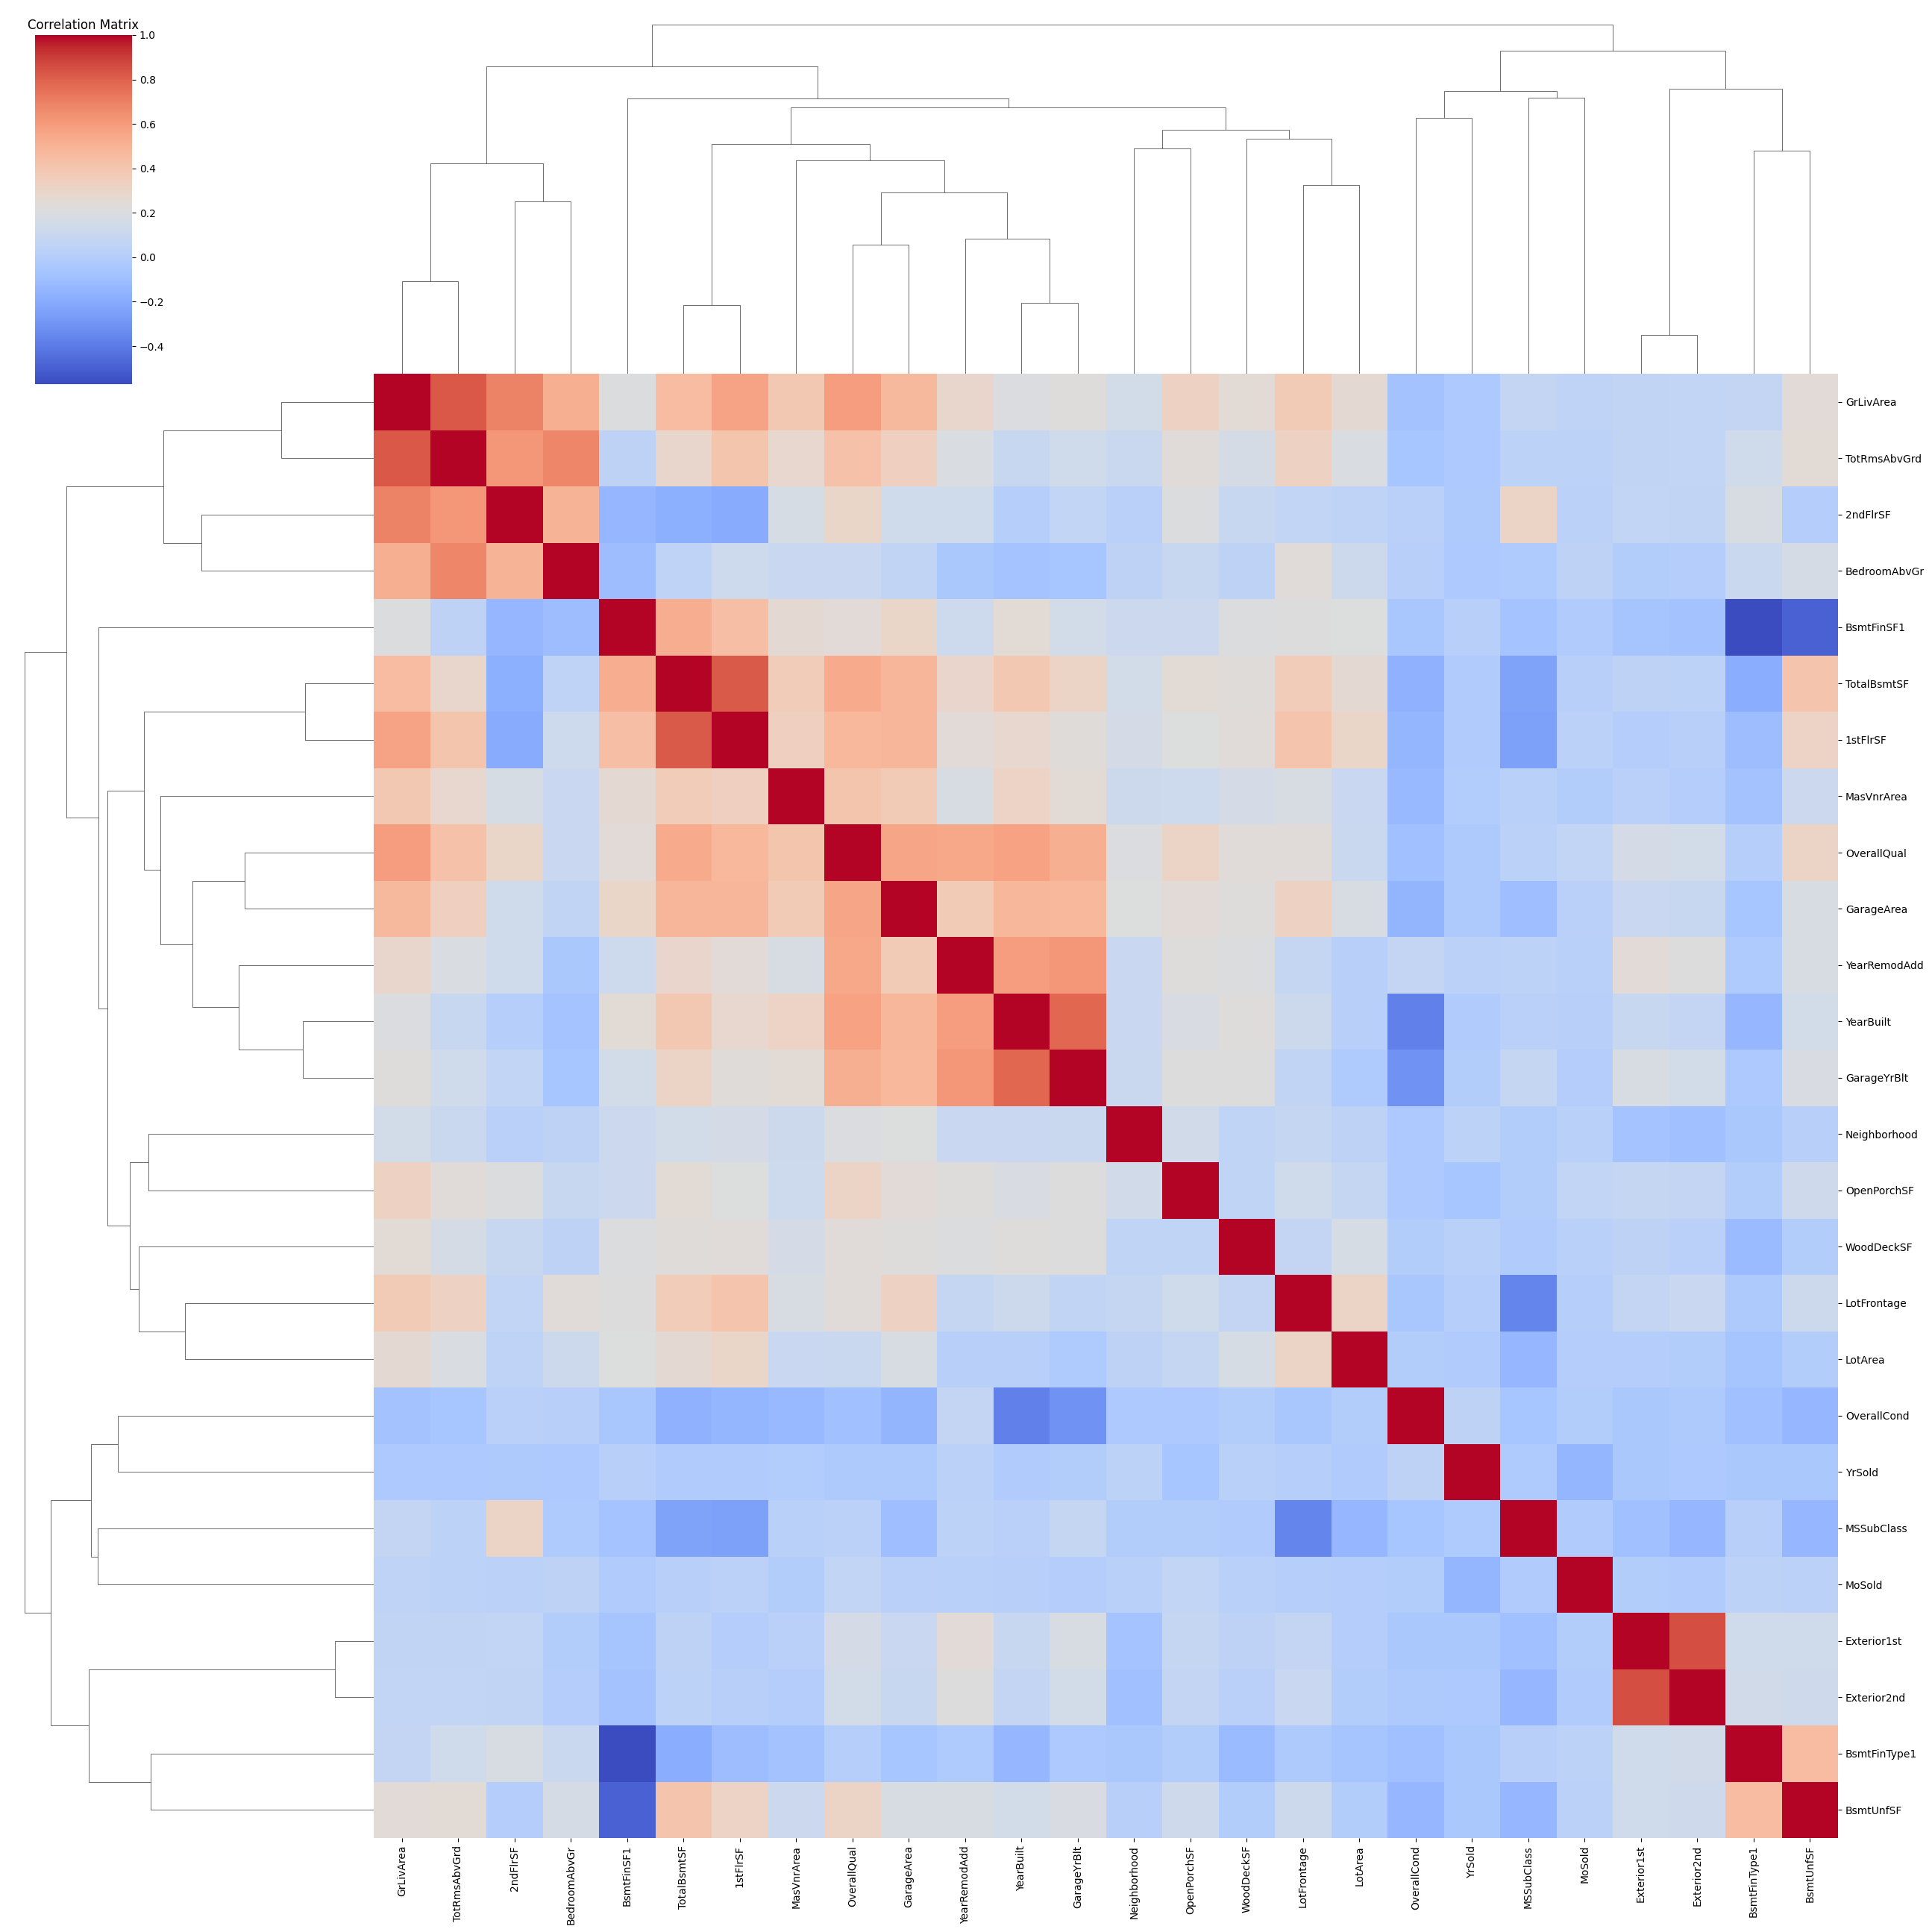

In [78]:
sns.clustermap(corr, annot=False, cmap='coolwarm', figsize=(26, 26))
plt.title('Correlation Matrix')
plt.show()

In [79]:
## adding the price column into the preprocessed dataset( train dataset)
train = pd.concat([preprocessed_dataset, y], axis=1)
train.head()

Neighborhood  Exterior1st  Exterior2nd  BsmtFinType1  MSSubClass  \
0             5           12           13             2        60.0   
1            24            8            8             0        20.0   
2             5           12           13             2        60.0   
3             6           13           15             0        70.0   
4            15           12           13             2        60.0   

   LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0   8450.0          7.0          5.0     2003.0        2003.0   
1         80.0   9600.0          6.0          8.0     1976.0        1976.0   
2         68.0  11250.0          7.0          5.0     2001.0        2002.0   
3         60.0   9550.0          7.0          5.0     1915.0        1970.0   
4         84.0  14260.0          8.0          5.0     2000.0        2000.0   

   MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0       196.0       706.0      150.0        856.0     856.0     854.0   
1         0.0       978.0      284.0       1262.0    1262.0       0.0   
2       162.0       486.0      434.0        920.0     920.0     866.0   
3         0.0       216.0      540.0        756.0     961.0     756.0   
4       350.0       655.0      490.0       1145.0    1145.0    1053.0   

   GrLivArea  BedroomAbvGr  TotRmsAbvGrd  GarageYrBlt  GarageArea  WoodDeckSF  \
0     1710.0           3.0           8.0       2003.0       548.0         0.0   
1     1262.0           3.0           6.0       1976.0       460.0       298.0   
2     1786.0           3.0           6.0       2001.0       608.0         0.0   
3     1717.0           3.0           7.0       1998.0       642.0         0.0   
4     2198.0           4.0           9.0       2000.0       836.0       192.0   

   OpenPorchSF  MoSold  YrSold  SalePrice  
0         61.0     2.0  2008.0   208500.0  
1          0.0     5.0  2007.0   181500.0  
2         42.0     9.0  2008.0   223500.0  
3         35.0     2.0  2006.0   140000.0  
4         84.0    12.0  2008.0   250000.0

In [80]:
train.shape

(1460, 27)

In [81]:
## importing the test dataset
test = pd.read_csv('test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [82]:
## preprocessing test dataset as the train dataset
test.shape

(1459, 80)

In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [84]:
## deleting columns with higher then 50% number of NAN amounts
test = test.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'MasVnrType'], axis=1)

In [85]:
## seperating the categorical features from the numerical ones
test.replace('NaN', np.nan, inplace=True)

In [86]:
data_types = test.dtypes

In [87]:
categorical_features = data_types[data_types == 'object'].index

In [88]:
categorical_test = test[categorical_features]

In [89]:
data_types = test.dtypes

In [90]:
numerical_features = data_types[data_types != 'object'].index

In [91]:
numerical_test = test[numerical_features]

In [92]:
## imputing NaN amounts with mean and mode recpectivly in numerical and categorical features
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(numerical_test)
numerical_test = imputer.transform(numerical_test)

In [93]:
numerical_imputed_test = pd.DataFrame(numerical_test, columns=numerical_features)

In [94]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(categorical_test)
categorical_test = imputer.transform(categorical_test)

In [95]:
categorical_imputed_test = pd.DataFrame(categorical_test, columns=categorical_features)

In [96]:
## Label Encoding the categorical features 
from sklearn.preprocessing import LabelEncoder

In [97]:
label_encoder = LabelEncoder()
for col in categorical_features:
    categorical_imputed_test[col] = label_encoder.fit_transform(categorical_imputed_test[col])

In [98]:
preprocessed_test = pd.concat([categorical_imputed_test, numerical_imputed_test], axis=1)
preprocessed_test.head()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         2       1         3            3          0          4          0   
1         3       1         0            3          0          0          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          4          0   
4         3       1         0            1          0          4          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
0            12           1           2         0           2          1   
1            12           2           2         0           2          3   
2             8           2           2         0           4          1   
3             8           2           2         0           4          1   
4            22           2           2         4           2          1   

   RoofMatl  Exterior1st  Exterior2nd  ExterQual  ExterCond  Foundation  \
0         0           10           12          3          4           1   
1         0           11           13          3          4           1   
2         0           10           12          3          4           2   
3         0           10           12          3          4           2   
4         0            6            6          2          4           2   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  \
0         3         3             3             4             3        0   
1         3         3             3             0             5        0   
2         2         3             3             2             5        0   
3         3         3             3             2             5        0   
4         2         3             3             0             5        0   

   HeatingQC  CentralAir  Electrical  KitchenQual  Functional  FireplaceQu  \
0          4           1           3            3           6            2   
1          4           1           3            2           6            2   
2          2           1           3            3           6            4   
3          0           1           3            2           6            2   
4          0           1           3            2           6            2   

   GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  SaleType  \
0           1             2           3           4           2         8   
1           1             2           3           4           2         8   
2           1             0           3           4           2         8   
3           1             0           3           4           2         8   
4           1             1           3           4           2         8   

   SaleCondition      Id  MSSubClass  LotFrontage  LotArea  OverallQual  \
0              4  1461.0        20.0         80.0  11622.0          5.0   
1              4  1462.0        20.0         81.0  14267.0          6.0   
2              4  1463.0        60.0         74.0  13830.0          5.0   
3              4  1464.0        60.0         78.0   9978.0          6.0   
4              4  1465.0       120.0         43.0   5005.0          8.0   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0          6.0     1961.0        1961.0         0.0       468.0       144.0   
1          6.0     1958.0        1958.0       108.0       923.0         0.0   
2          5.0     1997.0        1998.0         0.0       791.0         0.0   
3          6.0     1998.0        1998.0        20.0       602.0         0.0   
4          5.0     1992.0        1992.0         0.0       263.0         0.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0      270.0        882.0     896.0       0.0           0.0      896.0   
1      406.0       1329.0    1329.0       0.0           0.0     1329.0   
2      137.0        928.0     928.0     701.0           0.0     1629.0   
3      32

In [99]:
preprocessed_test = preprocessed_test[important_features_list]
preprocessed_test.shape

(1459, 26)

In [100]:
## implenting Multiple Linear Regression on Train Dataset 
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [101]:
## splitting the training dataset into the training set an test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [102]:
## Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [103]:
## Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),axis=1))

[[258630.64 200624.  ]
 [149331.38 133000.  ]
 [ 95837.4  110000.  ]
 [226961.18 192000.  ]
 [104011.94  88000.  ]
 [101293.81  85000.  ]
 [253358.73 282922.  ]
 [133364.71 141000.  ]
 [495917.96 745000.  ]
 [152513.28 148800.  ]
 [183677.76 208900.  ]
 [165453.47 136905.  ]
 [249710.43 225000.  ]
 [106661.42 123000.  ]
 [136326.82 119200.  ]
 [147710.95 145000.  ]
 [232859.09 190000.  ]
 [100953.89 123600.  ]
 [135826.98 149350.  ]
 [169281.   155000.  ]
 [129460.35 166000.  ]
 [154944.21 144500.  ]
 [105336.2  110000.  ]
 [155641.65 174000.  ]
 [194238.06 185000.  ]
 [198085.71 168000.  ]
 [159958.61 177500.  ]
 [ 42703.58  84500.  ]
 [315062.68 320000.  ]
 [125505.25 118500.  ]
 [165555.49 110000.  ]
 [213692.31 213000.  ]
 [146208.44 156000.  ]
 [285485.92 250000.  ]
 [297107.25 372500.  ]
 [195229.88 175000.  ]
 [273628.66 277500.  ]
 [109178.69 112500.  ]
 [224228.27 263000.  ]
 [329501.98 325000.  ]
 [209591.98 243000.  ]
 [111721.68 130000.  ]
 [184552.89 164990.  ]
 [290048.86

In [104]:
Z = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),axis=1)
z = pd.DataFrame(Z, columns=['y_pred', 'y_test'])
z.shape

(292, 2)

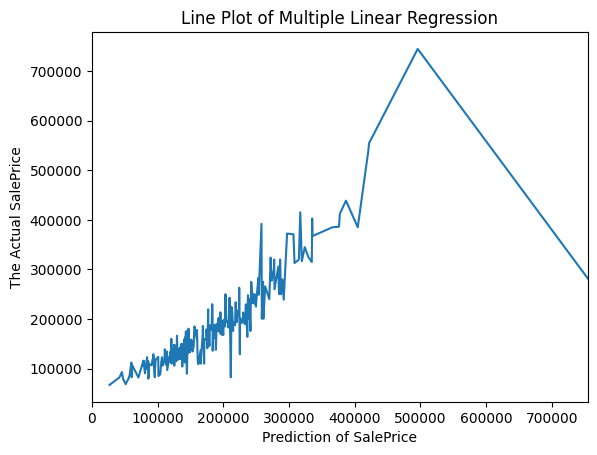

In [105]:
sns.lineplot(data=z, x='y_pred', y='y_test')
plt.xlim(0,755000)
plt.title('Line Plot of Multiple Linear Regression')
plt.xlabel('Prediction of SalePrice')
plt.ylabel('The Actual SalePrice')
plt.show()

In [106]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6238866321795771

In [107]:
## implementing Polynomial Regression on Train Dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [108]:
## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
## Apply polynomial transformation
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [110]:
## Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [111]:
## Make predictions and evaluate the model
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1101956828.2566094


In [112]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),axis=1))

[[130591.03 154500.  ]
 [335248.75 325000.  ]
 [ 88089.9  115000.  ]
 [174234.75 159000.  ]
 [299769.92 315500.  ]
 [114908.75  75500.  ]
 [215433.96 311500.  ]
 [139232.72 146000.  ]
 [133570.48  84500.  ]
 [157179.9  135500.  ]
 [141229.5  145000.  ]
 [130711.54 130000.  ]
 [105823.67  81000.  ]
 [199842.53 214000.  ]
 [181404.8  181000.  ]
 [147109.79 134500.  ]
 [185673.5  183500.  ]
 [134725.57 135000.  ]
 [122472.48 118400.  ]
 [230736.91 226000.  ]
 [128244.85 155000.  ]
 [205405.79 210000.  ]
 [172610.22 173500.  ]
 [105690.55 129000.  ]
 [202634.48 192000.  ]
 [154485.27 153900.  ]
 [178518.21 181134.  ]
 [109657.28 141000.  ]
 [180768.89 181000.  ]
 [193956.35 208900.  ]
 [173627.99 127000.  ]
 [281680.38 284000.  ]
 [191236.35 200500.  ]
 [107124.91 135750.  ]
 [260672.91 255000.  ]
 [142264.8  140000.  ]
 [131200.78 138000.  ]
 [205003.64 219500.  ]
 [304369.48 310000.  ]
 [ 97649.4   97000.  ]
 [-70732.39 114500.  ]
 [231827.95 205000.  ]
 [118711.6  119500.  ]
 [328539.46

In [113]:
P = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),axis=1)
p = pd.DataFrame(P, columns=['y_pred', 'y_test'])
p.shape

(292, 2)

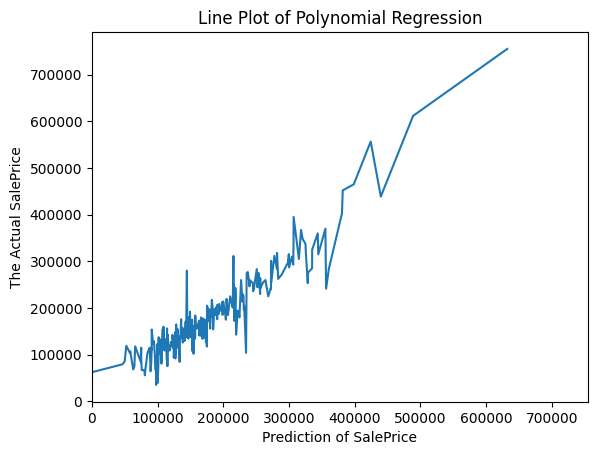

In [114]:
sns.lineplot(data=p, x='y_pred', y='y_test')
plt.xlim(0,755000)
plt.title('Line Plot of Polynomial Regression')
plt.xlabel('Prediction of SalePrice')
plt.ylabel('The Actual SalePrice')
plt.show()

In [115]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8563350764372875

In [116]:
## implementing Support Vector Regression on the Train Dataset
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
T = preprocessed_test.values

In [117]:
## feature scaling 
y = y.reshape(len(y), 1)

In [118]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)
y = y.ravel()

In [119]:
## Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [120]:
y_pred = regressor.predict(X)

In [121]:
y_pred_real = sc_y.inverse_transform(y_pred.reshape(-1,1))
y_real = sc_y.inverse_transform(y.reshape(-1,1))
Y = np.concatenate((y_pred_real, y_real), axis=1)
columns_names = ['Predicted SalePrice', 'Actual SalePrice']
SalePrices = pd.DataFrame(Y, columns=columns_names)
SalePrices

Predicted SalePrice  Actual SalePrice
0           209078.153131          208500.0
1           184429.950889          181500.0
2           215529.839724          223500.0
3           147933.411580          140000.0
4           289649.711483          250000.0
...                   ...               ...
1455        171298.834138          175000.0
1456        208368.610387          210000.0
1457        258522.658181          266500.0
1458        134192.261833          142125.0
1459        155424.443741          147500.0

[1460 rows x 2 columns]

In [122]:
y_pred_test = sc_y.inverse_transform(regressor.predict(sc_x.transform(T)).reshape(-1,1))

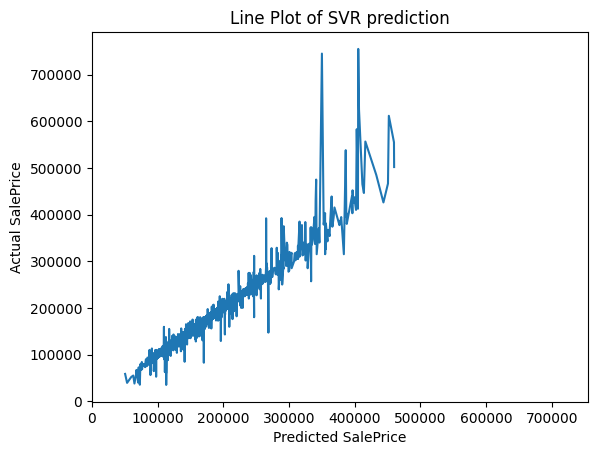

In [123]:
sns.lineplot(data=SalePrices, x='Predicted SalePrice', y='Actual SalePrice')
plt.xlim(0,755000)
plt.title('Line Plot of SVR prediction')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.show()

In [124]:
from sklearn.metrics import r2_score
r2_score(y_pred_real, y_real)

0.8906602192693484

In [125]:
## implementing Desicion Tree regression on the Training Dataset
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [127]:
y_test_pred = regressor.predict(X_test)
y_test_pred = y_test_pred.reshape(len(y_test_pred),1)
y_test = y_test.reshape(len(y_test),1)
Y = np.concatenate((y_test_pred, y_test), axis=1)
columns_names = ['Predicted SalePrice', 'Actual SalePrice']
SalePrices = pd.DataFrame(Y, columns=columns_names)

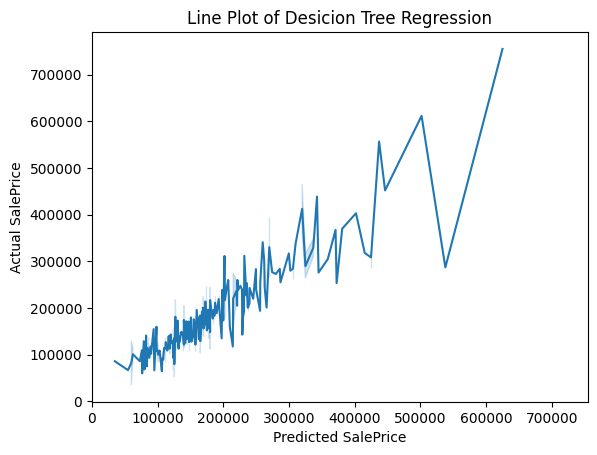

In [128]:
sns.lineplot(data=SalePrices, x='Predicted SalePrice', y='Actual SalePrice')
plt.xlim(0,755000)
plt.title('Line Plot of Desicion Tree Regression')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.show()

In [129]:
from sklearn.metrics import r2_score
r2_score(y_test_pred, y_test)

0.7691550718639284

In [154]:
## implementation of Random Forest Regression on Traning Dataset
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
## Appying K-Fold Cross Validation on Random Forest Regression
from sklearn.model_selection import cross_val_score
r2s = cross_val_score(estimator = regressor, X = X_test, y = y_test, cv = 10, n_jobs = -1, scoring = 'r2')
print(r2s)
print('\n And the mean of this r2s is :',r2s.mean())
print('\n And the std of this r2s is :',r2s.std())

[0.87 0.83 0.84 0.8  0.8  0.77 0.75 0.78 0.89 0.93]

 And the mean of this r2s is : 0.826334492504996

 And the std of this r2s is : 0.05322149712111492


In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth' : [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model,param_grid=param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('Best hyperparameters', best_params)
best_model = grid_search.best_estimator_
print('Best model is :',best_model)

Best hyperparameters {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best model is : RandomForestRegressor(max_depth=20, min_samples_split=5, random_state=42)


In [167]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10,random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [168]:
y_test_pred = regressor.predict(X_test)
y_test_pred = y_test_pred.reshape(len(y_test_pred),1)
y_test = y_test.reshape(len(y_test),1)
Y = np.concatenate((y_test_pred, y_test), axis=1)
columns_names = ['Predicted SalePrice', 'Actual SalePrice']
SalePrices = pd.DataFrame(Y, columns=columns_names)

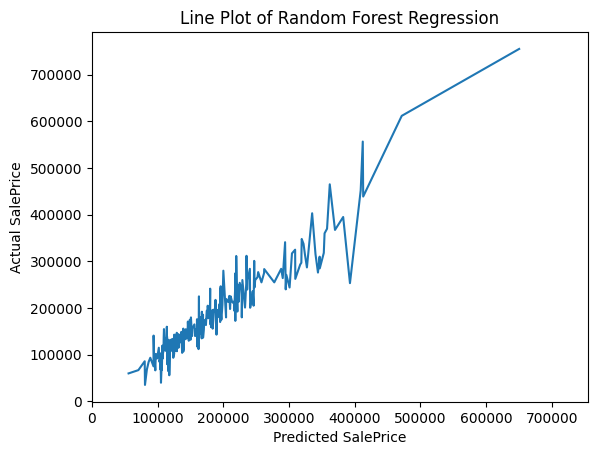

In [169]:
sns.lineplot(data=SalePrices, x='Predicted SalePrice', y='Actual SalePrice')
plt.xlim(0,755000)
plt.title('Line Plot of Random Forest Regression')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.show()

In [170]:
from sklearn.metrics import r2_score
r2_score(y_test_pred, y_test)

0.8628446306984856

In [137]:
## based on the R^2 metrice, the best fitted model wtih the traning data is SVR with the 0.8906602192693484 ratio
## Applying K-Fold Cross Validation and Grid Search on SVR model

In [138]:
## implementing Support Vector Regression on the Train Dataset
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
T = preprocessed_test.values

In [139]:
## feature scaling 
y = y.reshape(len(y), 1)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)
y = y.ravel()

In [140]:
## Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', C=1)
regressor.fit(X, y)

SVR(C=1)

In [141]:
y_pred = regressor.predict(X)
y_pred_real = sc_y.inverse_transform(y_pred.reshape(-1,1))
y_real = sc_y.inverse_transform(y.reshape(-1,1))
Y = np.concatenate((y_pred_real, y_real), axis=1)
columns_names = ['Predicted SalePrice', 'Actual SalePrice']
SalePrices = pd.DataFrame(Y, columns=columns_names)
SalePrices

Predicted SalePrice  Actual SalePrice
0           209078.153131          208500.0
1           184429.950889          181500.0
2           215529.839724          223500.0
3           147933.411580          140000.0
4           289649.711483          250000.0
...                   ...               ...
1455        171298.834138          175000.0
1456        208368.610387          210000.0
1457        258522.658181          266500.0
1458        134192.261833          142125.0
1459        155424.443741          147500.0

[1460 rows x 2 columns]

In [142]:
## K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
r2s = cross_val_score(estimator = regressor, X = X, y = y, cv = 5, n_jobs = -1, scoring = 'r2')
print(r2s)
print('\n And the mean of this r2s is :',r2s.mean())
print('\n And the std of this r2s is :',r2s.std())

[0.86 0.88 0.76 0.87 0.74]

 And the mean of this r2s is : 0.8213796883472959

 And the std of this r2s is : 0.06006102985447575


In [143]:
## Grid Search Application
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [0.25, 0.5, 0.75, 1], 'kernel' : ['linear']},
              {'C' : [0.25, 0.5, 0.75, 1], 'kernel' : ['rbf'], 'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
              {'C' : [0.25, 0.5, 0.75, 1], 'kernel' : ['poly'], 'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
              {'C' : [0.25, 0.5, 0.75, 1], 'kernel' : ['sigmoid'], 'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters, scoring = 'r2', cv = 10, n_jobs = -1)
grid_search.fit(X, y)
best_r2 = grid_search.best_score_
best_parameters = grid_search.best_params_
print('\n And the best r2s is :',best_r2)
print('\n And the best parameters  of this r2s are :',best_parameters)


 And the best r2s is : 0.7979760702449589

 And the best parameters  of this r2s are : {'C': 0.75, 'kernel': 'linear'}


In [144]:
## Randomized Search Application
from sklearn.model_selection import train_test_split,RandomizedSearchCV
model = SVR()
param_distributions = {
    'C' : [0.25,0.5,0.75,1],
    'kernel' : ['linear', 'rft', 'poly','sigmoid'],
    'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    random_state=42
)
random_search.fit(X, y)
best_params = random_search.best_params_
print('Best hyperparametes:',best_params)
best_model = random_search.best_estimator_
test_score = best_model.score(X, y)
print(f"Test R_squared score with the best hyperparameters: {test_score:.4f}")

Best hyperparametes: {'kernel': 'linear', 'gamma': 0.4, 'C': 0.25}
Test R_squared score with the best hyperparameters: 0.7931


C:\Users\Bashir Rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bashir Rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bashir Rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Bashir Rayaneh\AppData\Local\Programs\Python\Python3

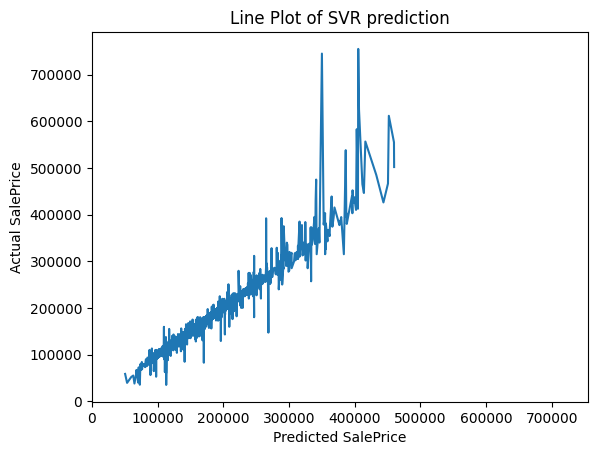

In [145]:
y_pred_test = sc_y.inverse_transform(regressor.predict(sc_x.transform(T)).reshape(-1,1))
sns.lineplot(data=SalePrices, x='Predicted SalePrice', y='Actual SalePrice')
plt.xlim(0,755000)
plt.title('Line Plot of SVR prediction')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.show()

In [146]:
from sklearn.metrics import r2_score
r2_score(y_pred_real, y_real)

0.8906602192693484

In [147]:
## XGBoost model
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [149]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [150]:
y_test_pred = regressor.predict(X_test)
y_test_pred = y_test_pred.reshape(len(y_test_pred),1)
y_test = y_test.reshape(len(y_test),1)
Y = np.concatenate((y_test_pred, y_test), axis=1)
columns_names = ['Predicted SalePrice', 'Actual SalePrice']
SalePrices = pd.DataFrame(Y, columns=columns_names)

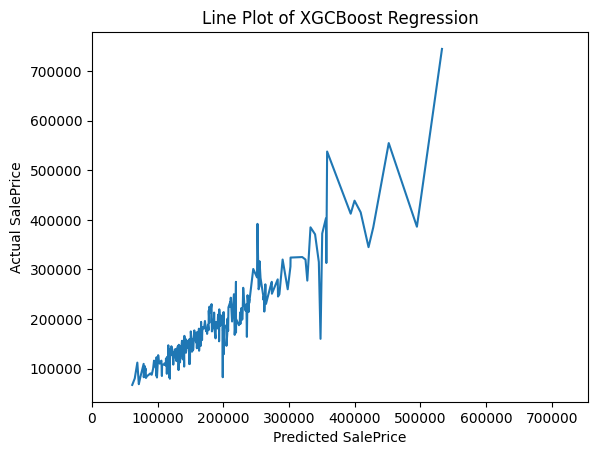

In [151]:
sns.lineplot(data=SalePrices, x='Predicted SalePrice', y='Actual SalePrice')
plt.xlim(0,755000)
plt.title('Line Plot of XGCBoost Regression')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.show()

In [152]:
from sklearn.metrics import r2_score
r2_score(y_test_pred, y_test)

0.8225382898848996